In [1]:
!git clone https://github.com/oserikov/nn_harmony_np.git
%cd nn_harmony_np

Cloning into 'nn_harmony_np'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 88 (delta 35), reused 74 (delta 22), pack-reused 0
Unpacking objects: 100% (88/88), done.
/content/nn_harmony_np


In [0]:
from nn_model import NNModel, ModelStateLogDTO
from nn_model import NNModel, ModelStateLogDTO
from experiment_datasets_creator import ExperimentCreator
from phonology_tool import PhonologyTool
from experiment_datasets_creator import ExperimentCreator
from phonology_tool import PhonologyTool
from google.colab import files
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import pydotplus


In [0]:
train_data_fn = "data/tur_apertium_words.txt"


train_dataset = []
alphabet = set()
with open(train_data_fn, 'r', encoding="utf-8") as train_data_f:
    for line in train_data_f:
        train_dataset.append(line.strip())
        [alphabet.add(c) for c in line.strip()]



In [0]:
training_mode = "pretrained"

assert training_mode in ["train", "pretrained"]

if training_mode == "train":
    EPOCHS_NUM = 300


    hidden_sizes = [2,3,4,5,6,7,8,9,10]
    hidden_types = ["sigmoid", "tanh", "relu"]

    model_filenames = []

    for hidden_type in hidden_types:
        for hidden_size in hidden_sizes:
            model_filename = f"model_size_{hidden_size}_activation_{hidden_type}.pkl"

            model = NNModel(alphabet, hidden_size, activation=hidden_type)

            train_data = [(entry[:-1], entry[1:]) for entry in train_dataset]
            for epoch_num, epoch_loss in model.train(train_data, EPOCHS_NUM):
                print('\t'.join([f"hidden_size: {hidden_size}", 
                                 f"hidden_type:{hidden_type}",
                                 f"epoch_num: {epoch_num}", 
                                 f"epoch_loss: {epoch_loss}"]))

            model.save(model_filename)
            model_filenames.append(model_filename)

            
if training_mode == "pretrained":
    !cp models/*.pkl ./
    model_filenames = !ls *.pkl
    model_filenames = [fn for fns in model_filenames for fn in fns.split()]


In [0]:
if training_mode == "train":
    [files.download(model_filename) for model_filename in model_filenames]

In [0]:

test_data_fn = "data/tur_swadesh.txt"
phonology_features_filename = "data/tur_phon_features.tsv"

datasets = []
for model_filename in model_filenames:
    model_filename_prefix = model_filename.rstrip(".pkl")

    model = NNModel.load_model(model_filename)

    test_dataset = []
    with open(test_data_fn, 'r', encoding="utf-8") as test_data_f:
        for line in test_data_f:
            if all(c in model.alphabet for c in line.strip()):
                test_dataset.append(line.strip())

    phonologyTool = PhonologyTool(phonology_features_filename)
    experimentCreator = ExperimentCreator(model, test_dataset, phonologyTool)

    # front_harmony_dataset
    front_harmony_dataset_fn = model_filename_prefix+ "_front_harmony_dataset.tsv"
    front_harmony_dataset = experimentCreator.make_dataset_pretty(experimentCreator.front_harmony_dataset())
    experimentCreator.save_dataset_to_tsv(front_harmony_dataset, front_harmony_dataset_fn)
    datasets.append(front_harmony_dataset_fn)
    
    # vov_vs_cons_dataset
    vov_vs_cons_dataset_fn = model_filename_prefix+ "_vov_vs_cons_dataset.tsv"
    vov_vs_cons_dataset = experimentCreator.make_dataset_pretty(experimentCreator.vov_vs_cons_dataset())
    experimentCreator.save_dataset_to_tsv(vov_vs_cons_dataset, vov_vs_cons_dataset_fn)
    datasets.append(vov_vs_cons_dataset_fn)
    
    # front_feature_dataset
    front_feature_dataset_fn = model_filename_prefix+ "_front_feature_dataset.tsv"
    front_feature_dataset = experimentCreator.make_dataset_pretty(experimentCreator.front_feature_dataset())
    experimentCreator.save_dataset_to_tsv(front_feature_dataset, front_feature_dataset_fn)
    datasets.append(front_feature_dataset_fn)
    
    # is_starting_consonant_cluster_dataset
    is_starting_consonant_cluster_dataset_fn = model_filename_prefix+ "_is_starting_consonant_cluster_dataset.tsv"
    is_starting_consonant_cluster_dataset = experimentCreator.make_dataset_pretty(experimentCreator.is_starting_consonant_cluster_dataset())
    experimentCreator.save_dataset_to_tsv(is_starting_consonant_cluster_dataset, is_starting_consonant_cluster_dataset_fn)
    datasets.append(is_starting_consonant_cluster_dataset_fn)
    
    # second_consonant_in_cluster_dataset
    second_consonant_in_cluster_dataset_fn = model_filename_prefix+ "_second_consonant_in_cluster_dataset.tsv"
    second_consonant_in_cluster_dataset = experimentCreator.make_dataset_pretty(experimentCreator.second_consonant_in_cluster_dataset())
    experimentCreator.save_dataset_to_tsv(second_consonant_in_cluster_dataset, second_consonant_in_cluster_dataset_fn)
    datasets.append(second_consonant_in_cluster_dataset_fn)
    
    # voiced_stop_consonant_dataset
    voiced_stop_consonant_dataset_fn = model_filename_prefix+ "_voiced_stop_consonant_dataset.tsv"
    voiced_stop_consonant_dataset = experimentCreator.make_dataset_pretty(experimentCreator.voiced_stop_consonant_dataset())
    experimentCreator.save_dataset_to_tsv(voiced_stop_consonant_dataset, voiced_stop_consonant_dataset_fn)
    datasets.append(voiced_stop_consonant_dataset_fn)
    

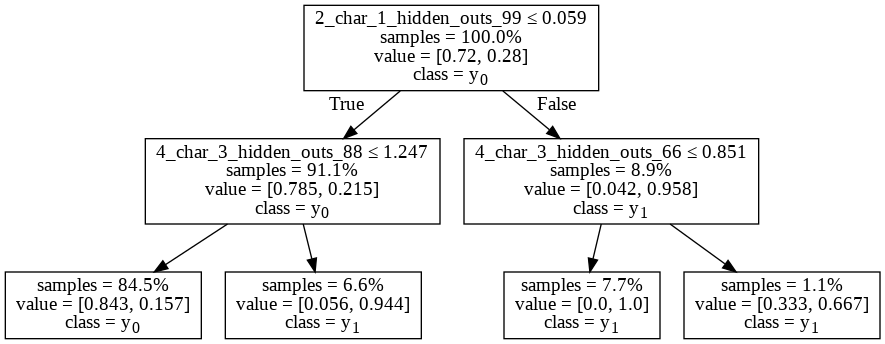

model_size_10_activation_relu_front_harmony_dataset.tsv
accuracy:  0.8597785977859779




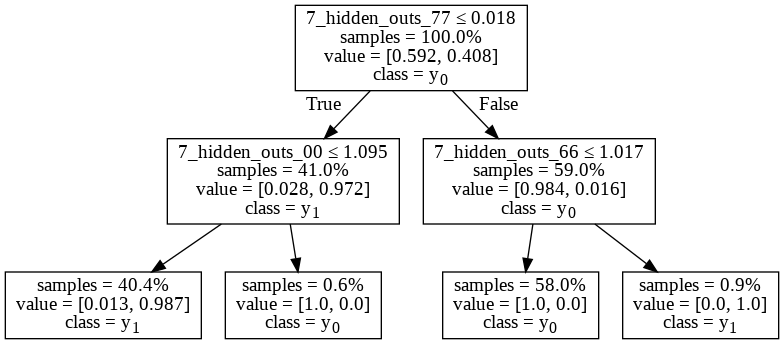

model_size_10_activation_relu_vov_vs_cons_dataset.tsv
accuracy:  0.9948186528497409




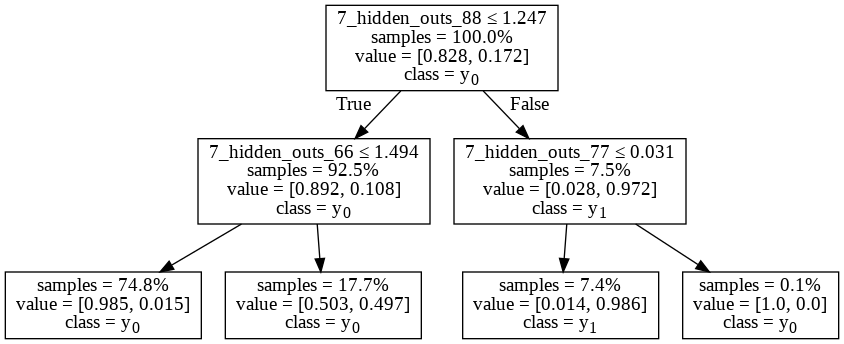

model_size_10_activation_relu_front_feature_dataset.tsv
accuracy:  0.8994818652849741




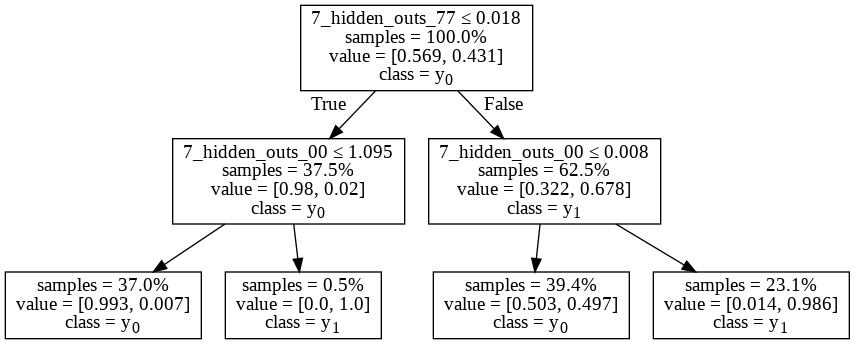

model_size_10_activation_relu_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.7985074626865671




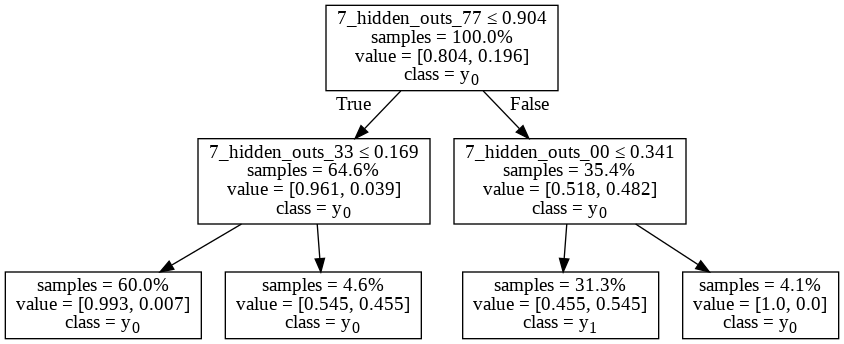

model_size_10_activation_relu_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8325041459369817




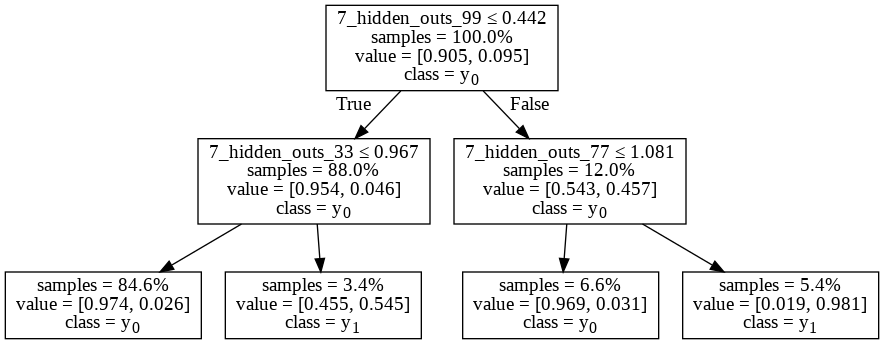

model_size_10_activation_relu_voiced_stop_consonant_dataset.tsv
accuracy:  0.9595854922279793




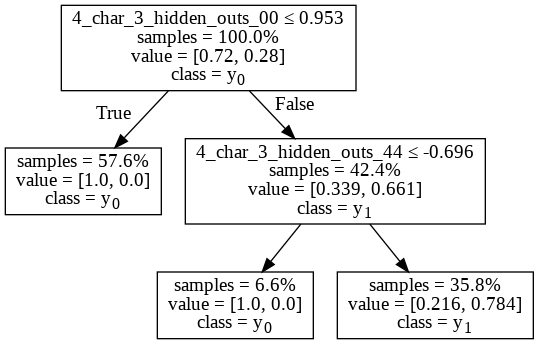

model_size_5_activation_tanh_front_harmony_dataset.tsv
accuracy:  0.922509225092251




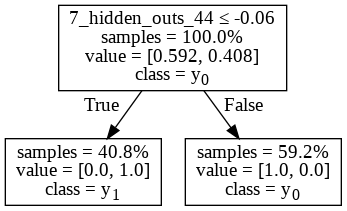

model_size_5_activation_tanh_vov_vs_cons_dataset.tsv
accuracy:  1.0




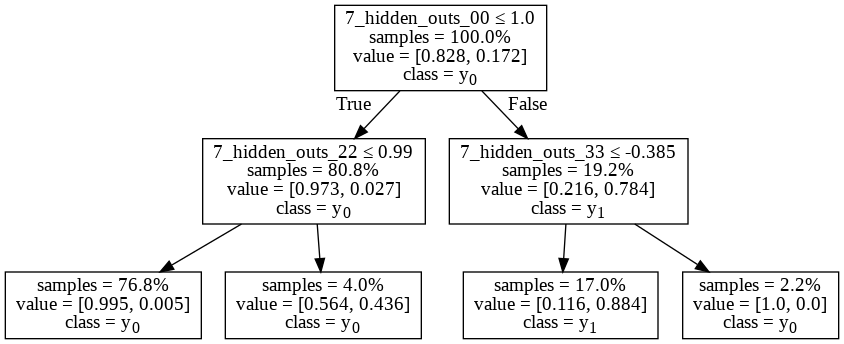

model_size_5_activation_tanh_front_feature_dataset.tsv
accuracy:  0.9585492227979274




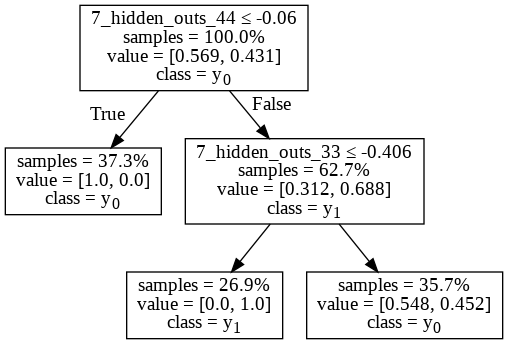

model_size_5_activation_tanh_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8383084577114428




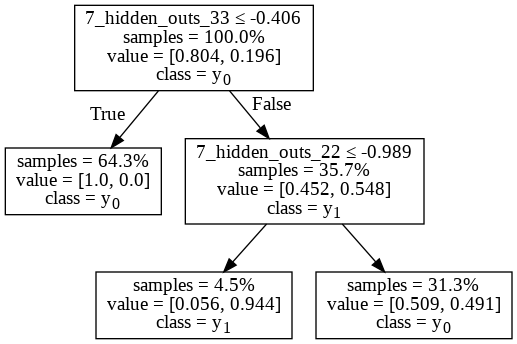

model_size_5_activation_tanh_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8441127694859039




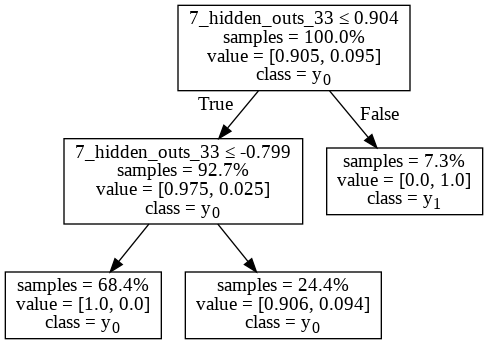

model_size_5_activation_tanh_voiced_stop_consonant_dataset.tsv
accuracy:  0.9772020725388602




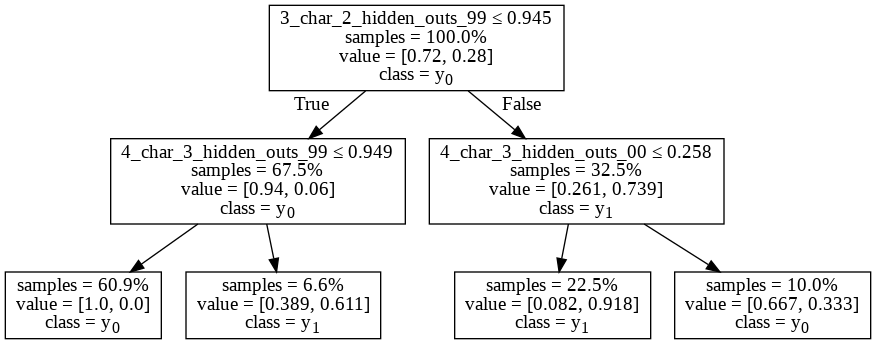

model_size_10_activation_sigmoid_front_harmony_dataset.tsv
accuracy:  0.922509225092251




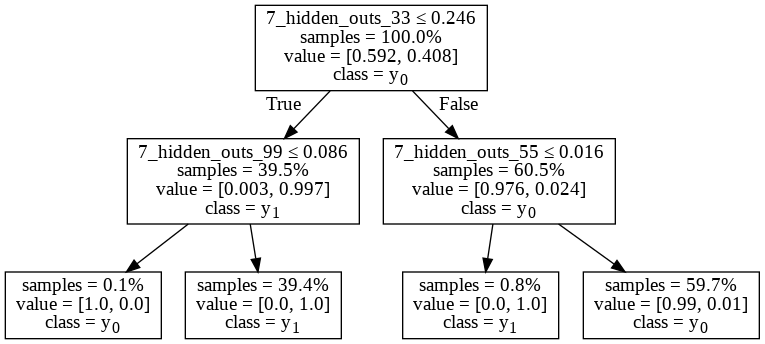

model_size_10_activation_sigmoid_vov_vs_cons_dataset.tsv
accuracy:  0.9937823834196892




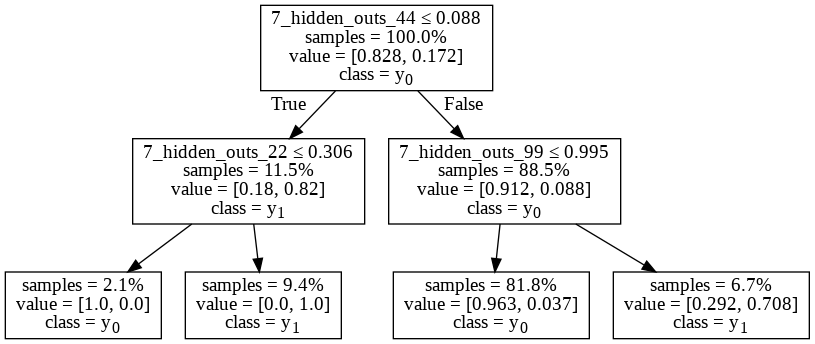

model_size_10_activation_sigmoid_front_feature_dataset.tsv
accuracy:  0.950259067357513




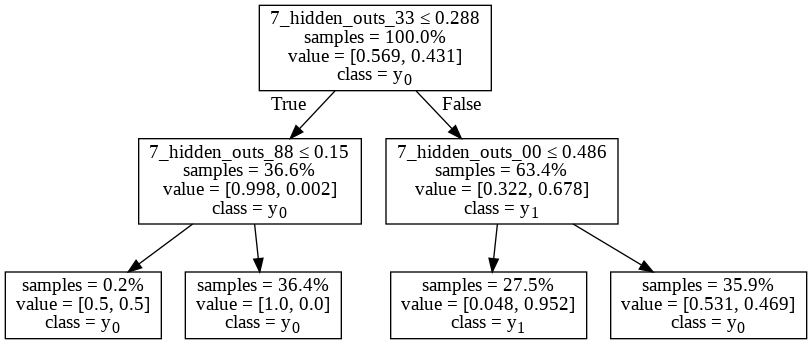

model_size_10_activation_sigmoid_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8175787728026535




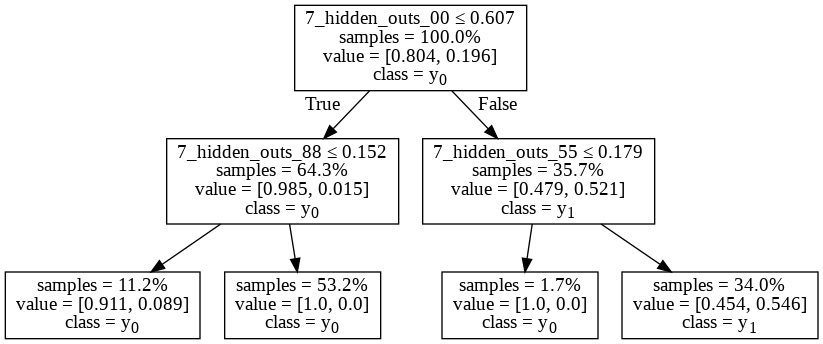

model_size_10_activation_sigmoid_second_consonant_in_cluster_dataset.tsv
accuracy:  0.835820895522388




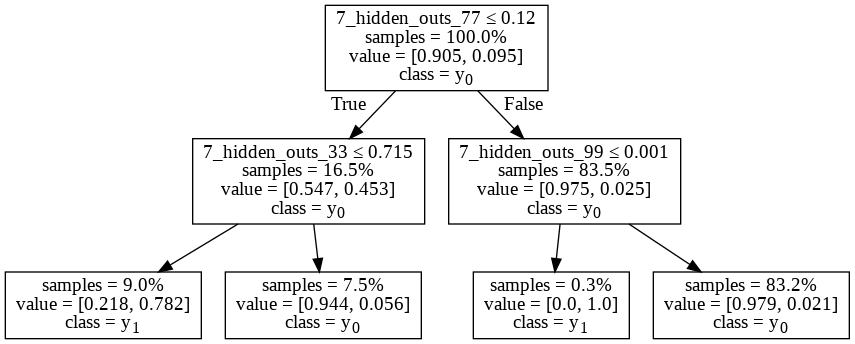

model_size_10_activation_sigmoid_voiced_stop_consonant_dataset.tsv
accuracy:  0.9585492227979274




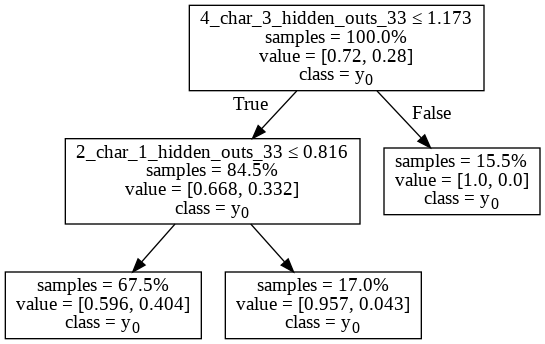

model_size_6_activation_relu_front_harmony_dataset.tsv
accuracy:  0.7195571955719557




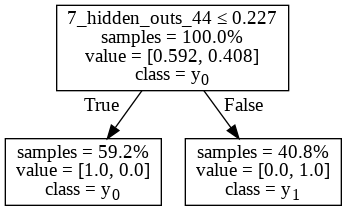

model_size_6_activation_relu_vov_vs_cons_dataset.tsv
accuracy:  1.0




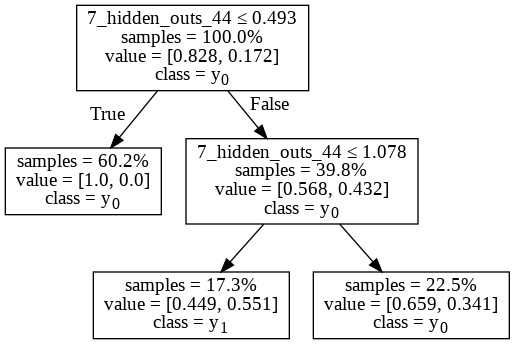

model_size_6_activation_relu_front_feature_dataset.tsv
accuracy:  0.8455958549222798




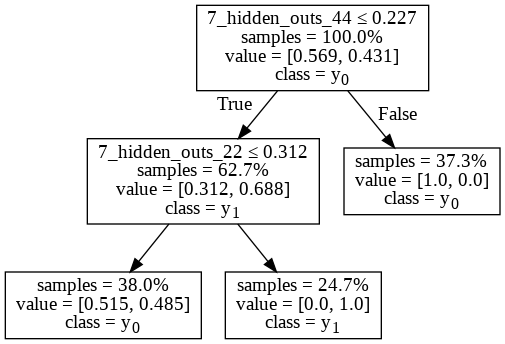

model_size_6_activation_relu_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8159203980099502




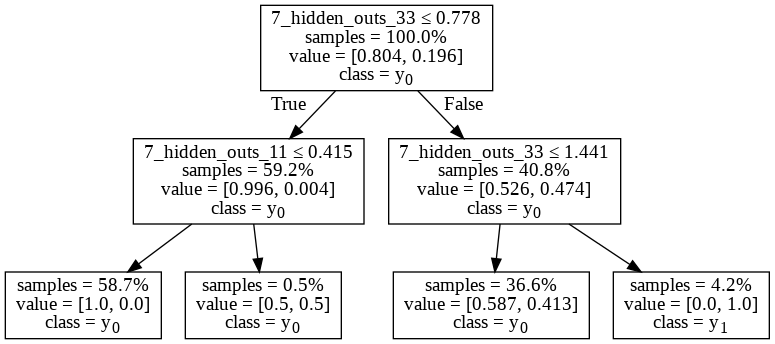

model_size_6_activation_relu_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8466003316749585




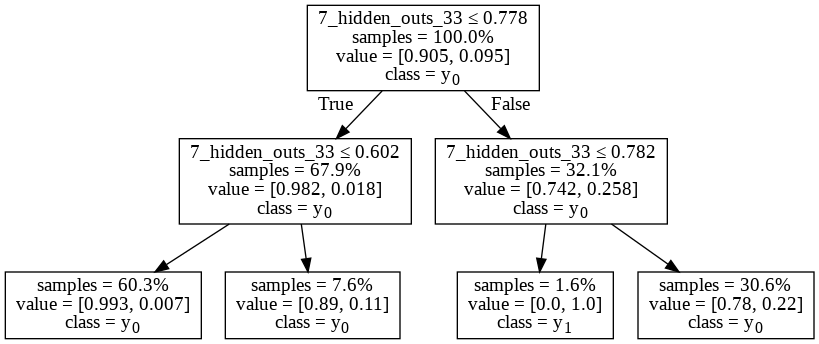

model_size_6_activation_relu_voiced_stop_consonant_dataset.tsv
accuracy:  0.9202072538860103




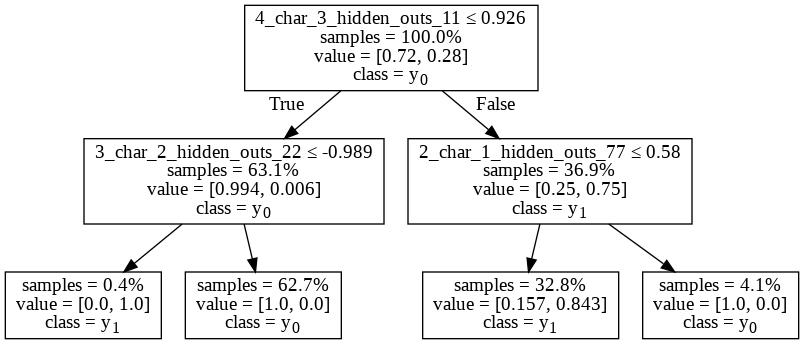

model_size_10_activation_tanh_front_harmony_dataset.tsv
accuracy:  0.948339483394834




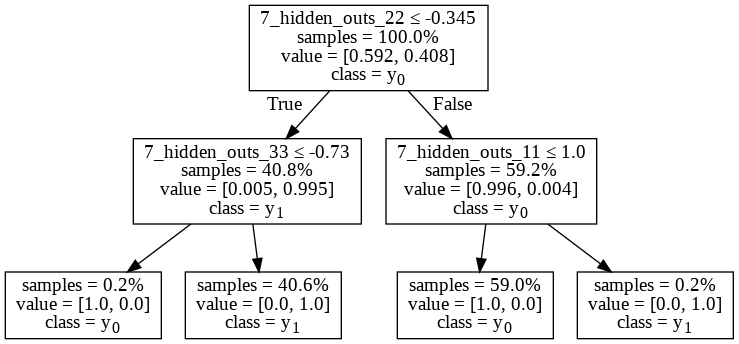

model_size_10_activation_tanh_vov_vs_cons_dataset.tsv
accuracy:  1.0




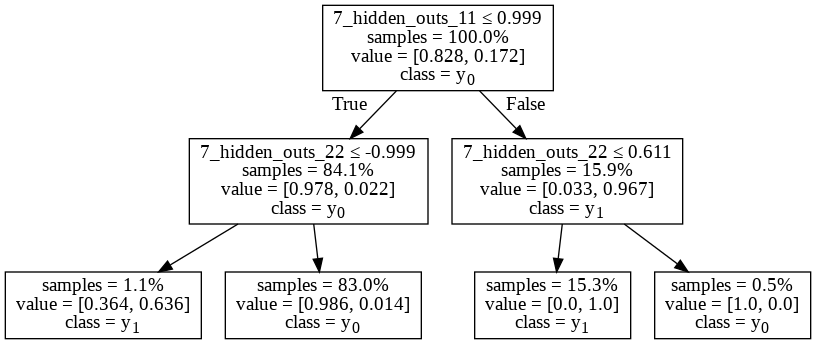

model_size_10_activation_tanh_front_feature_dataset.tsv
accuracy:  0.9844559585492227




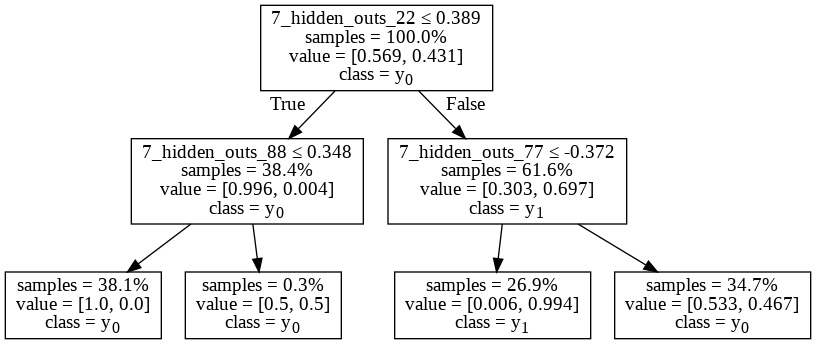

model_size_10_activation_tanh_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8349917081260365




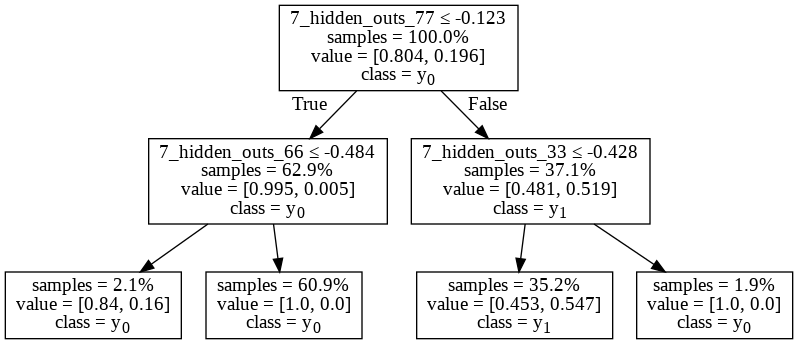

model_size_10_activation_tanh_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8374792703150912




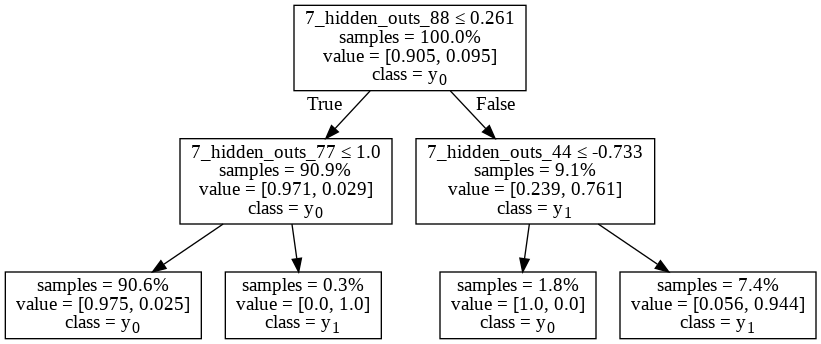

model_size_10_activation_tanh_voiced_stop_consonant_dataset.tsv
accuracy:  0.9730569948186528




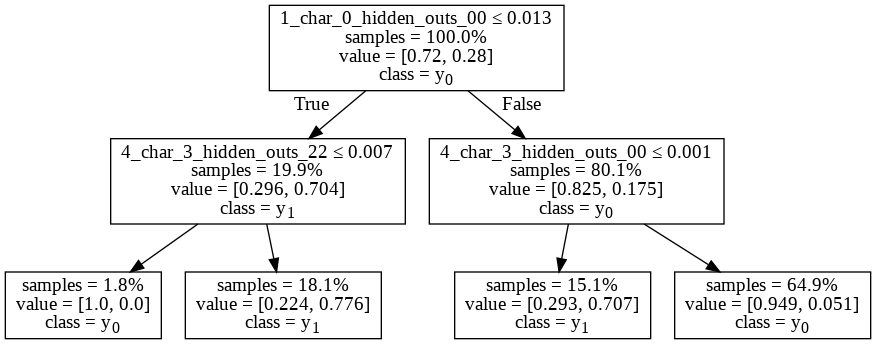

model_size_6_activation_sigmoid_front_harmony_dataset.tsv
accuracy:  0.8819188191881919




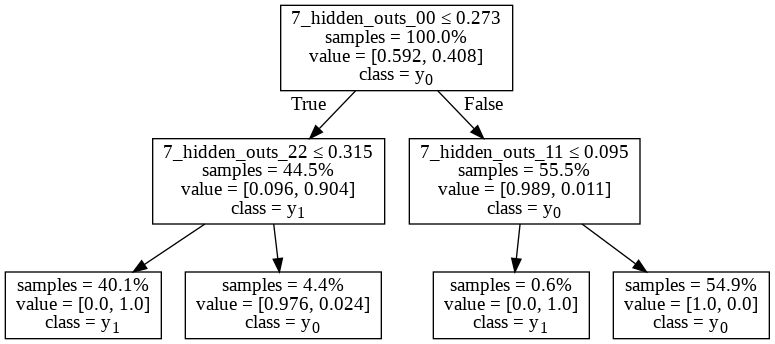

model_size_6_activation_sigmoid_vov_vs_cons_dataset.tsv
accuracy:  0.9989637305699481




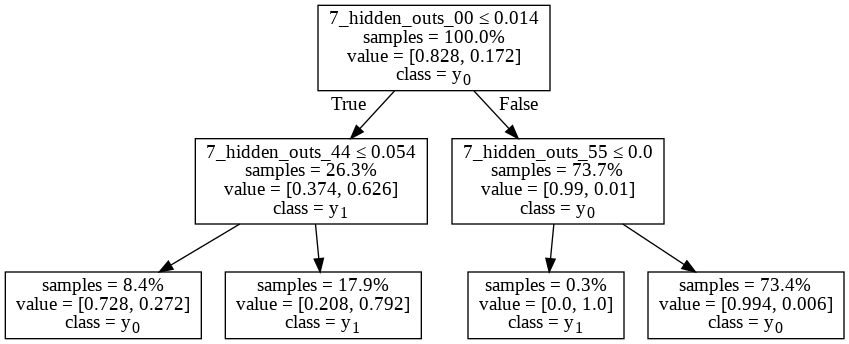

model_size_6_activation_sigmoid_front_feature_dataset.tsv
accuracy:  0.9357512953367876




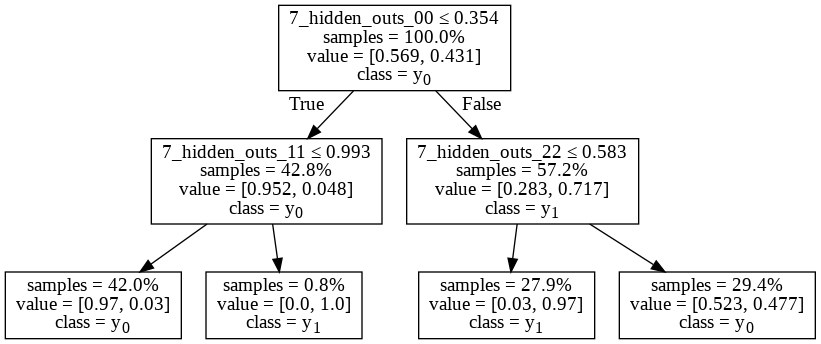

model_size_6_activation_sigmoid_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8391376451077943




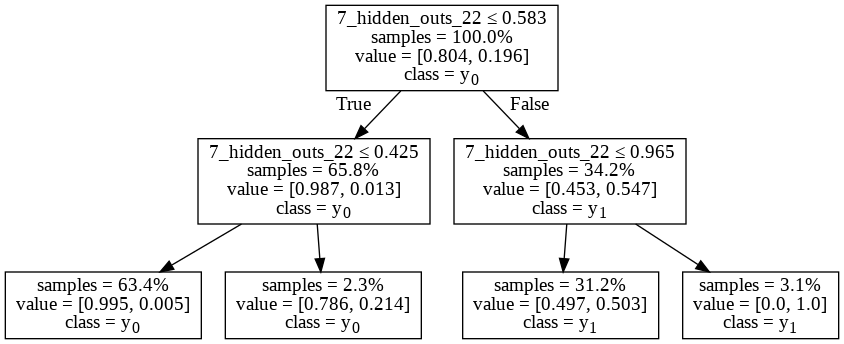

model_size_6_activation_sigmoid_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8366500829187397




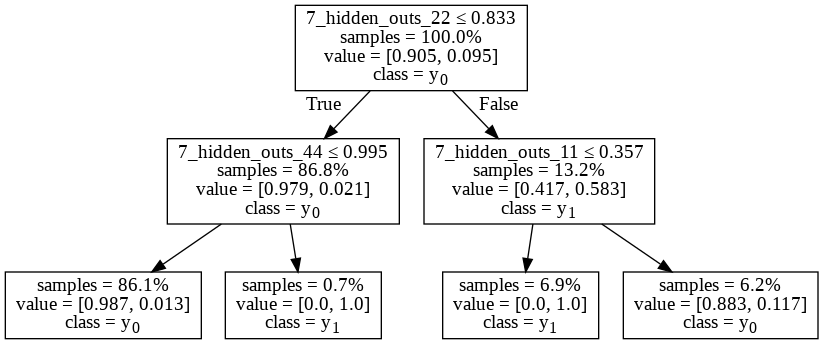

model_size_6_activation_sigmoid_voiced_stop_consonant_dataset.tsv
accuracy:  0.9813471502590674




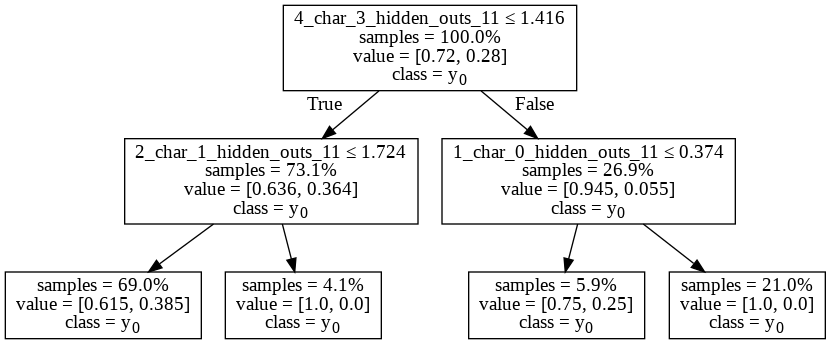

model_size_2_activation_relu_front_harmony_dataset.tsv
accuracy:  0.7195571955719557




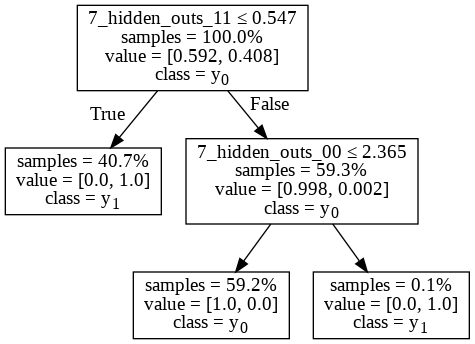

model_size_2_activation_relu_vov_vs_cons_dataset.tsv
accuracy:  1.0




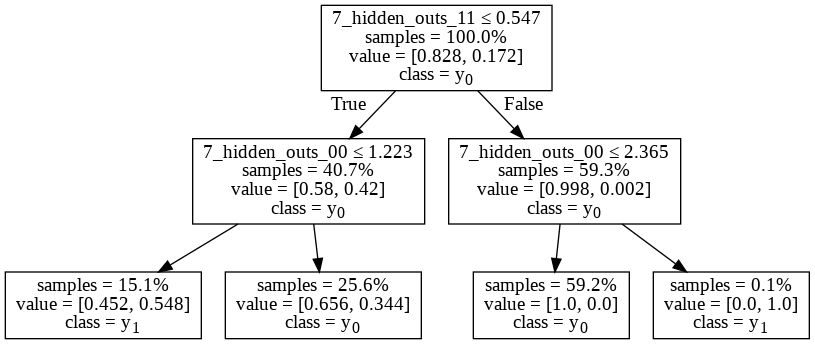

model_size_2_activation_relu_front_feature_dataset.tsv
accuracy:  0.8435233160621761




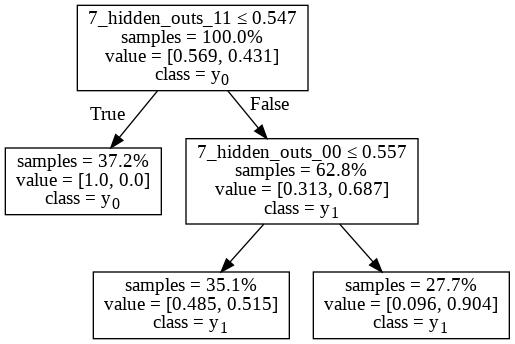

model_size_2_activation_relu_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8034825870646766




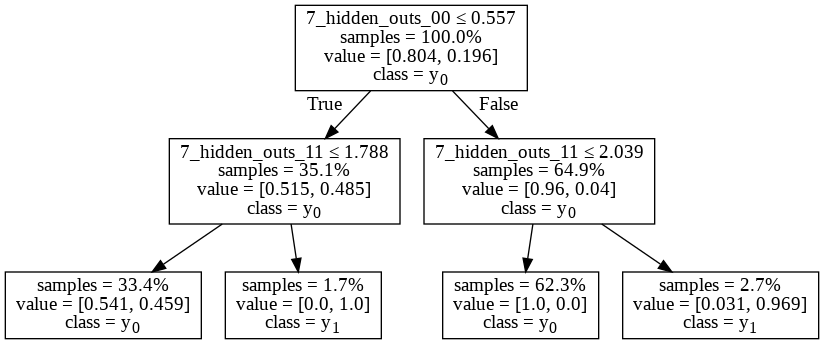

model_size_2_activation_relu_second_consonant_in_cluster_dataset.tsv
accuracy:  0.845771144278607




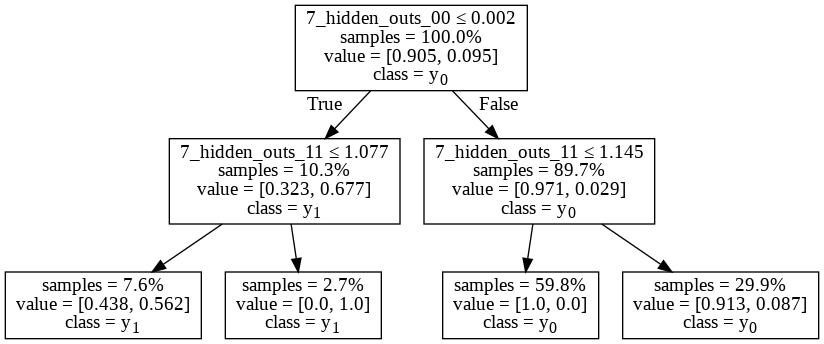

model_size_2_activation_relu_voiced_stop_consonant_dataset.tsv
accuracy:  0.9409326424870467




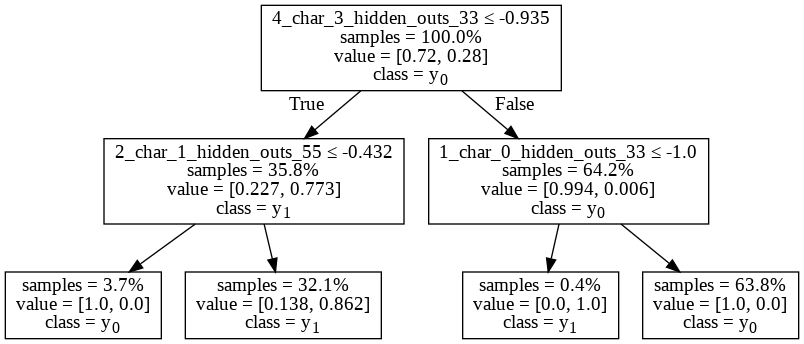

model_size_6_activation_tanh_front_harmony_dataset.tsv
accuracy:  0.955719557195572




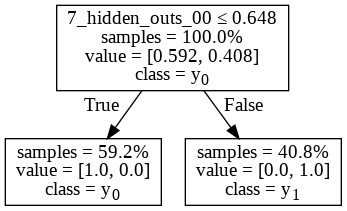

model_size_6_activation_tanh_vov_vs_cons_dataset.tsv
accuracy:  1.0




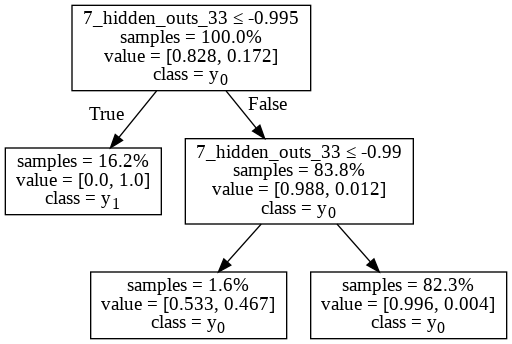

model_size_6_activation_tanh_front_feature_dataset.tsv
accuracy:  0.9896373056994818




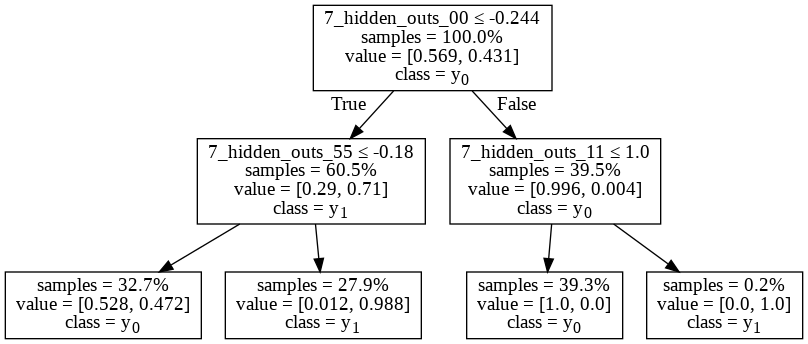

model_size_6_activation_tanh_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8424543946932007




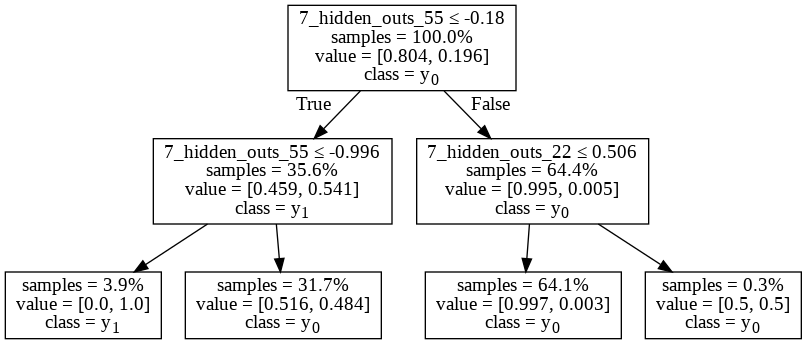

model_size_6_activation_tanh_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8432835820895522




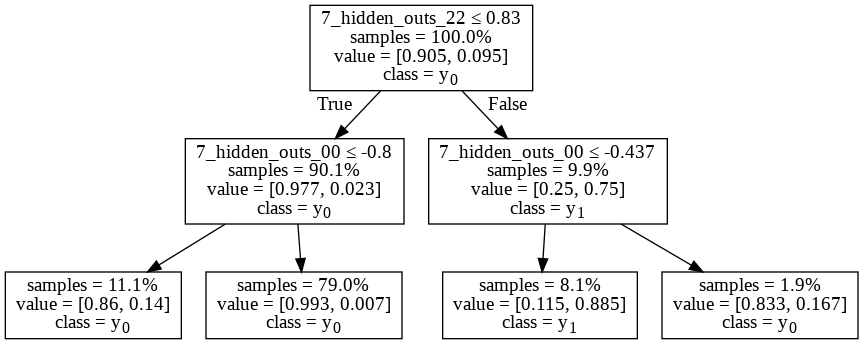

model_size_6_activation_tanh_voiced_stop_consonant_dataset.tsv
accuracy:  0.966839378238342




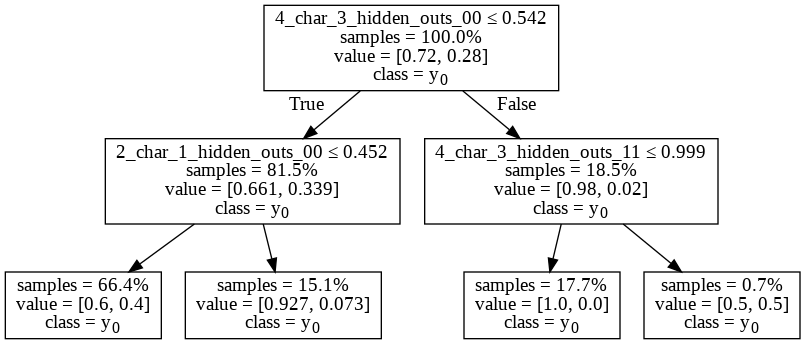

model_size_2_activation_sigmoid_front_harmony_dataset.tsv
accuracy:  0.7195571955719557




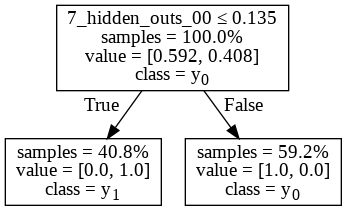

model_size_2_activation_sigmoid_vov_vs_cons_dataset.tsv
accuracy:  1.0




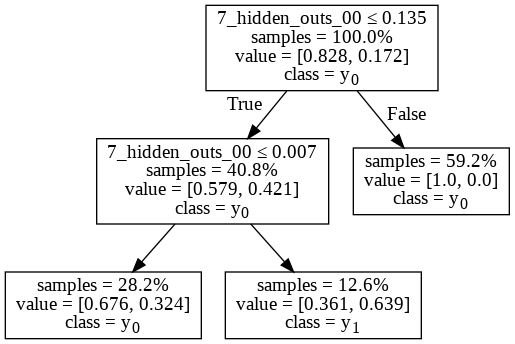

model_size_2_activation_sigmoid_front_feature_dataset.tsv
accuracy:  0.8632124352331606




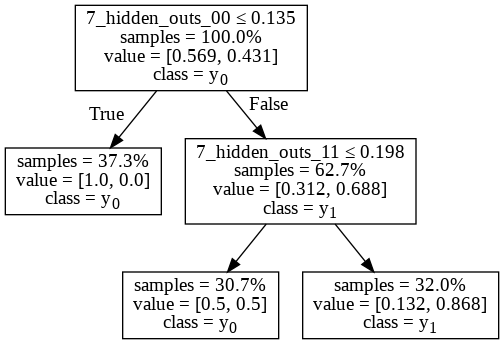

model_size_2_activation_sigmoid_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8043117744610282




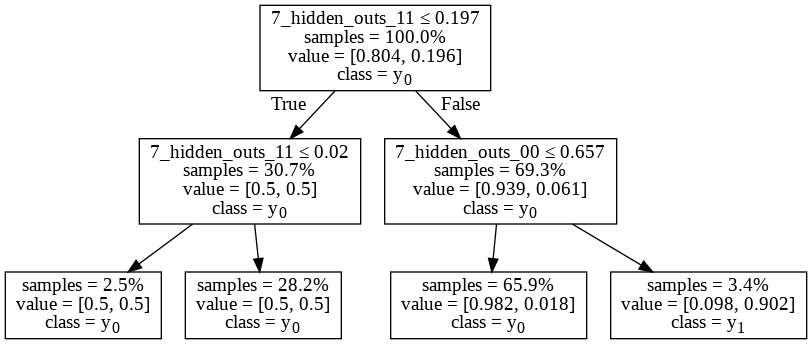

model_size_2_activation_sigmoid_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8316749585406302




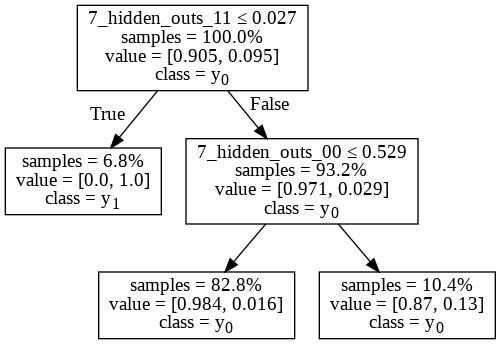

model_size_2_activation_sigmoid_voiced_stop_consonant_dataset.tsv
accuracy:  0.9730569948186528




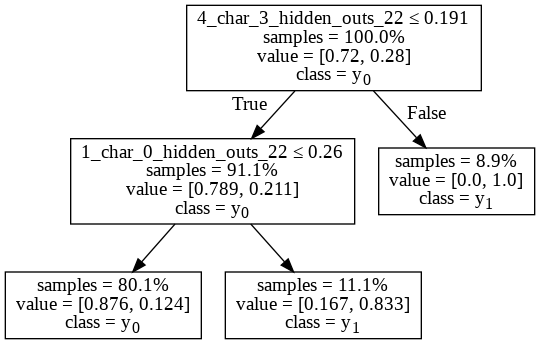

model_size_7_activation_relu_front_harmony_dataset.tsv
accuracy:  0.8819188191881919




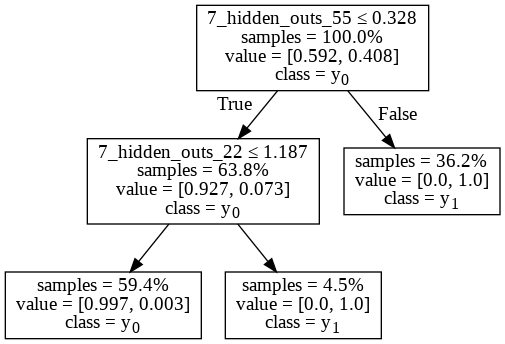

model_size_7_activation_relu_vov_vs_cons_dataset.tsv
accuracy:  0.9979274611398964




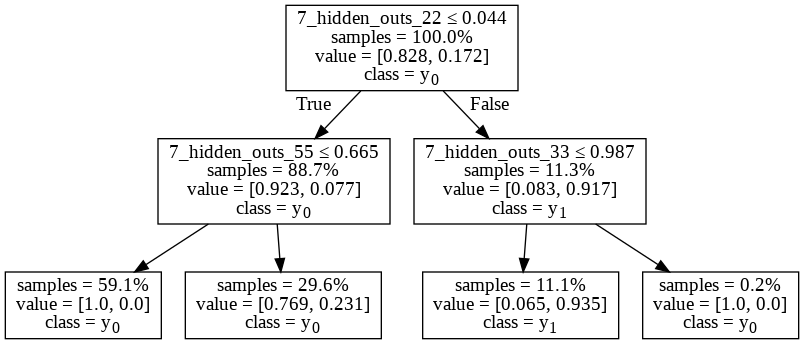

model_size_7_activation_relu_front_feature_dataset.tsv
accuracy:  0.9243523316062177




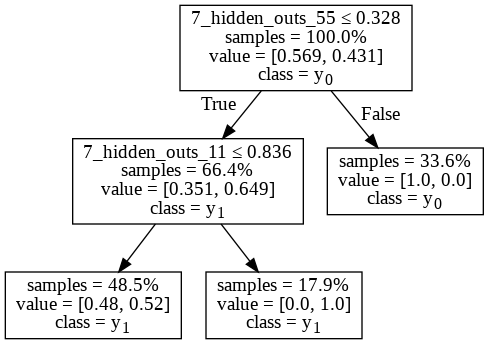

model_size_7_activation_relu_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.7669983416252073




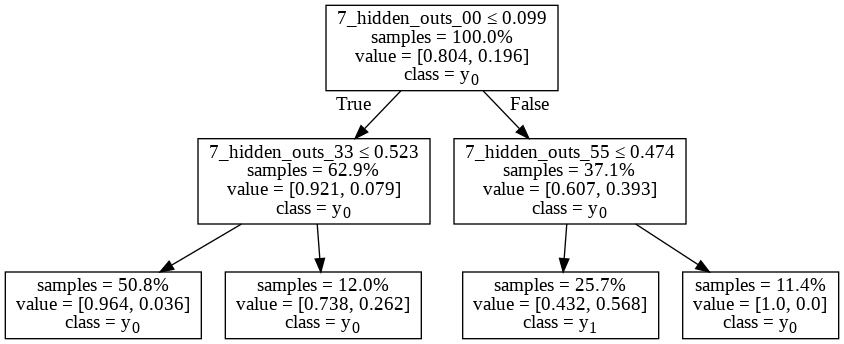

model_size_7_activation_relu_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8391376451077943




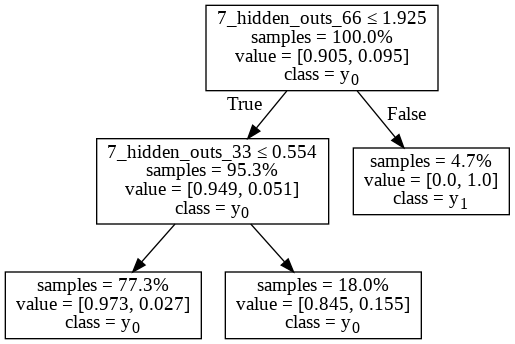

model_size_7_activation_relu_voiced_stop_consonant_dataset.tsv
accuracy:  0.9512953367875647




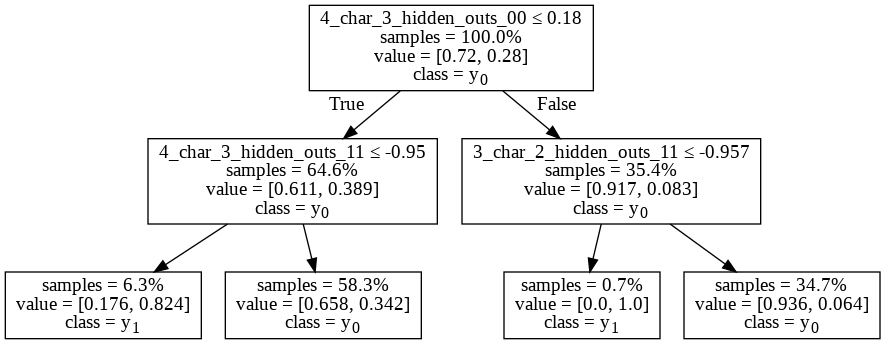

model_size_2_activation_tanh_front_harmony_dataset.tsv
accuracy:  0.7675276752767528




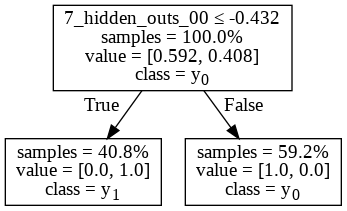

model_size_2_activation_tanh_vov_vs_cons_dataset.tsv
accuracy:  1.0




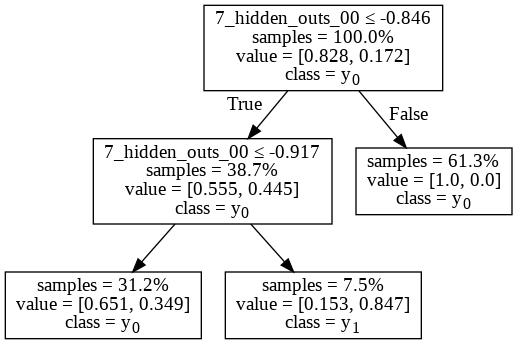

model_size_2_activation_tanh_front_feature_dataset.tsv
accuracy:  0.8797927461139896




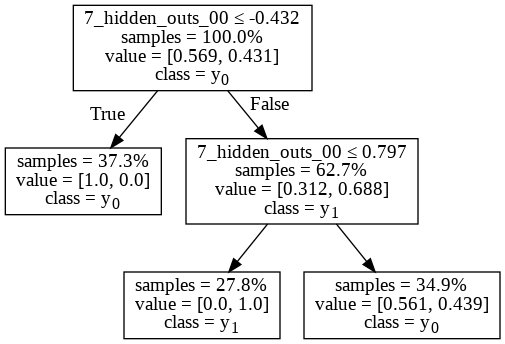

model_size_2_activation_tanh_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8466003316749585




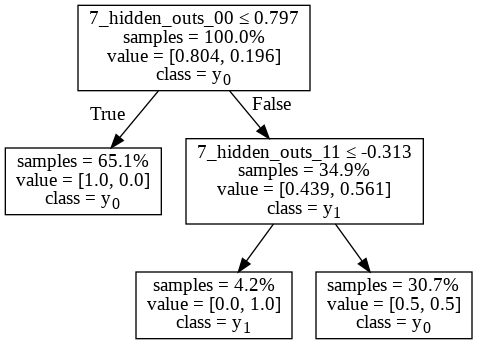

model_size_2_activation_tanh_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8466003316749585




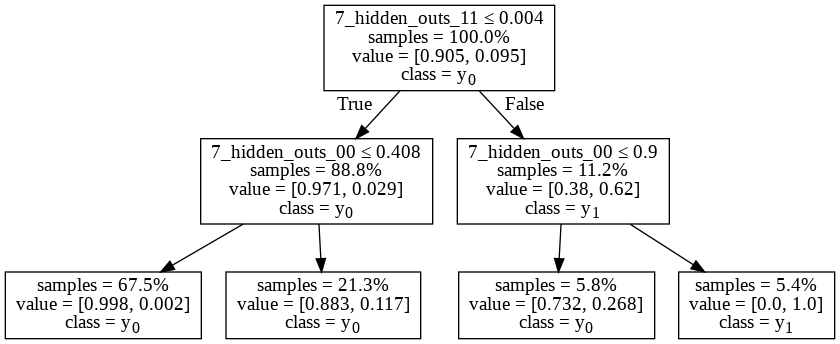

model_size_2_activation_tanh_voiced_stop_consonant_dataset.tsv
accuracy:  0.9585492227979274




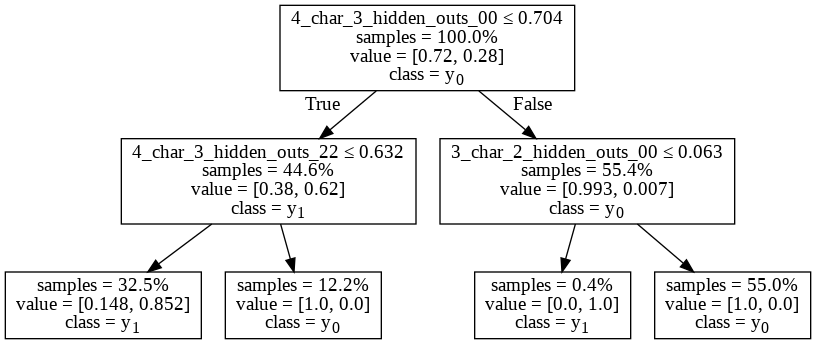

model_size_7_activation_sigmoid_front_harmony_dataset.tsv
accuracy:  0.9520295202952029




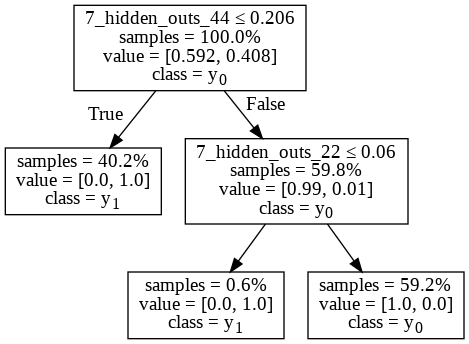

model_size_7_activation_sigmoid_vov_vs_cons_dataset.tsv
accuracy:  1.0




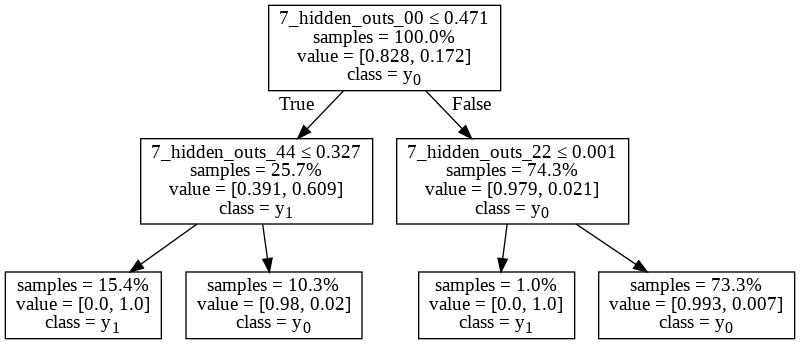

model_size_7_activation_sigmoid_front_feature_dataset.tsv
accuracy:  0.9927461139896373




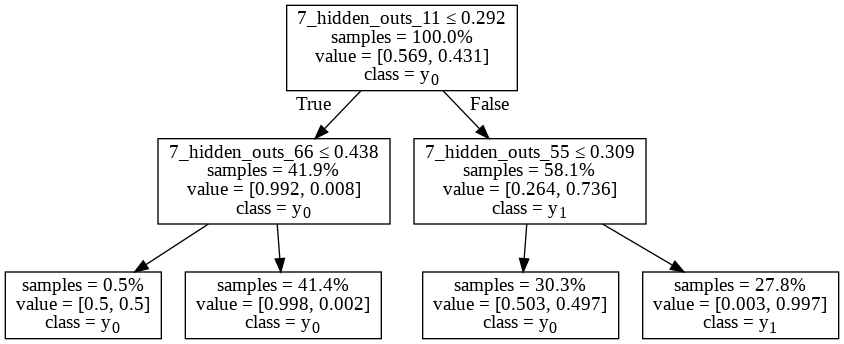

model_size_7_activation_sigmoid_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8449419568822554




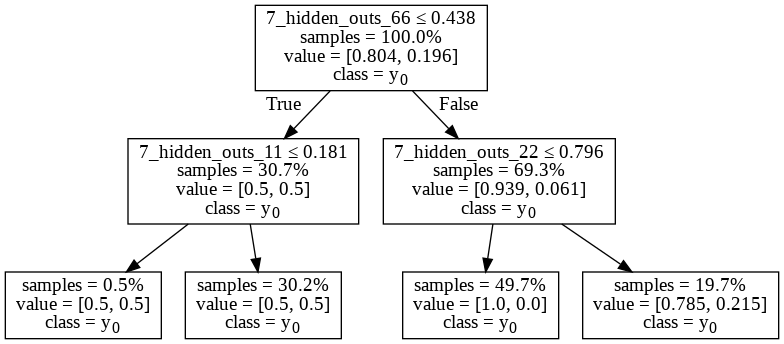

model_size_7_activation_sigmoid_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8043117744610282




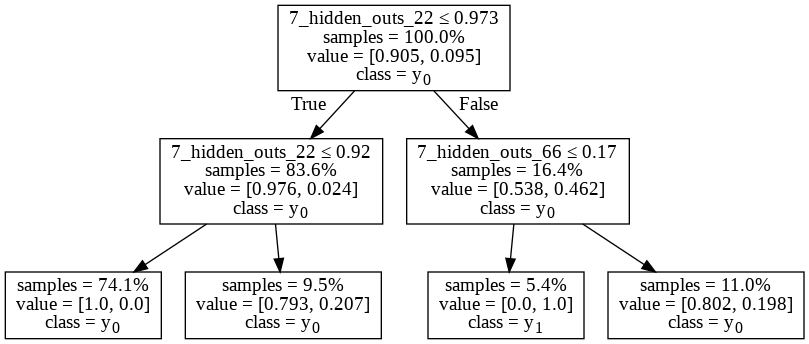

model_size_7_activation_sigmoid_voiced_stop_consonant_dataset.tsv
accuracy:  0.9585492227979274




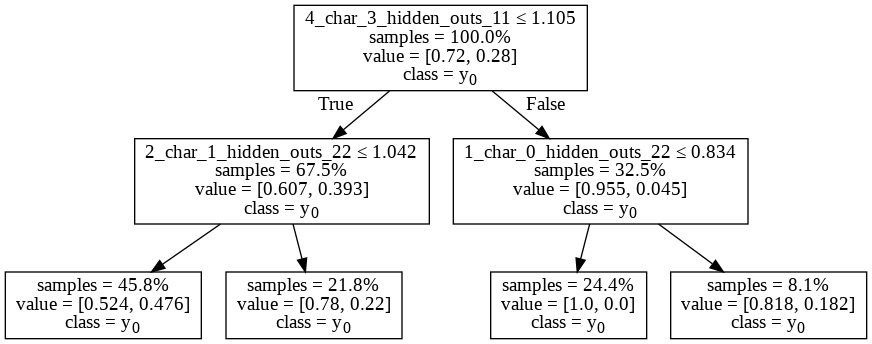

model_size_3_activation_relu_front_harmony_dataset.tsv
accuracy:  0.7195571955719557




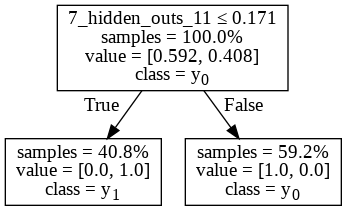

model_size_3_activation_relu_vov_vs_cons_dataset.tsv
accuracy:  1.0




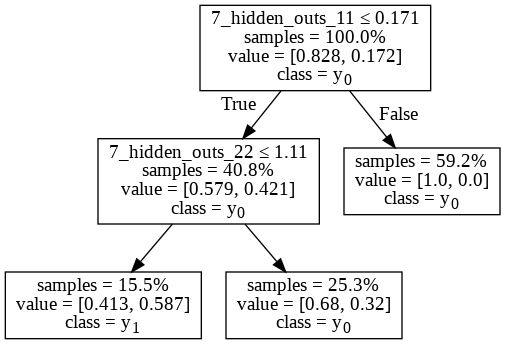

model_size_3_activation_relu_front_feature_dataset.tsv
accuracy:  0.8549222797927462




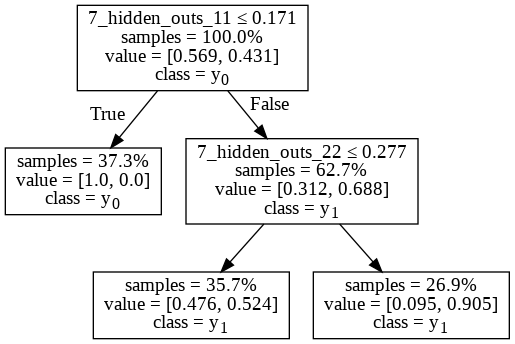

model_size_3_activation_relu_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8043117744610282




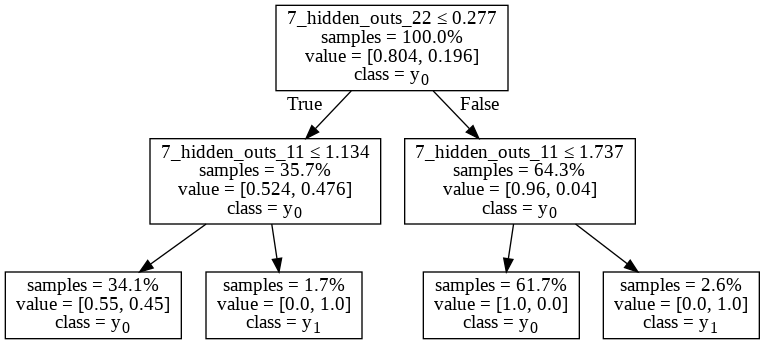

model_size_3_activation_relu_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8466003316749585




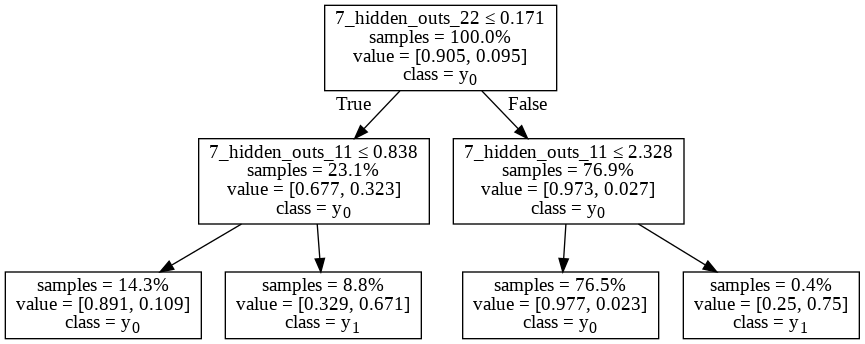

model_size_3_activation_relu_voiced_stop_consonant_dataset.tsv
accuracy:  0.9367875647668393




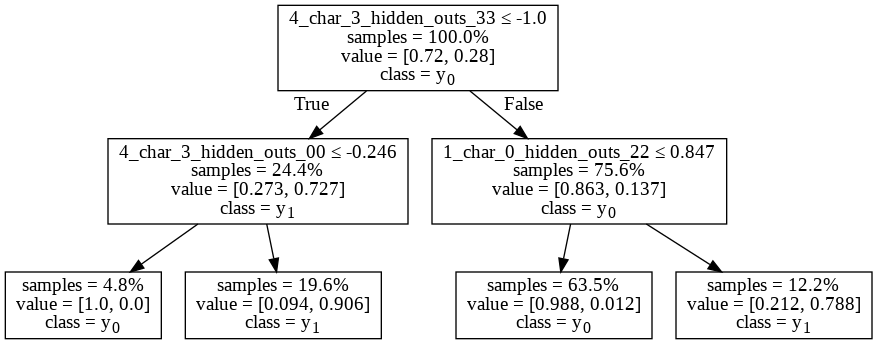

model_size_7_activation_tanh_front_harmony_dataset.tsv
accuracy:  0.948339483394834




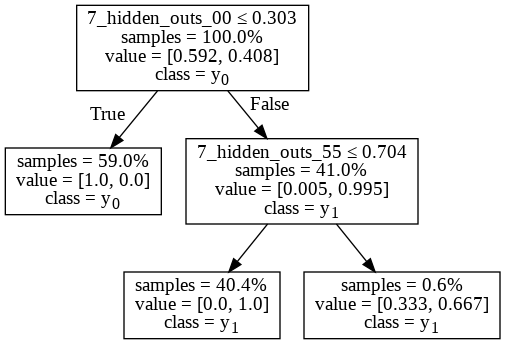

model_size_7_activation_tanh_vov_vs_cons_dataset.tsv
accuracy:  0.9979274611398964




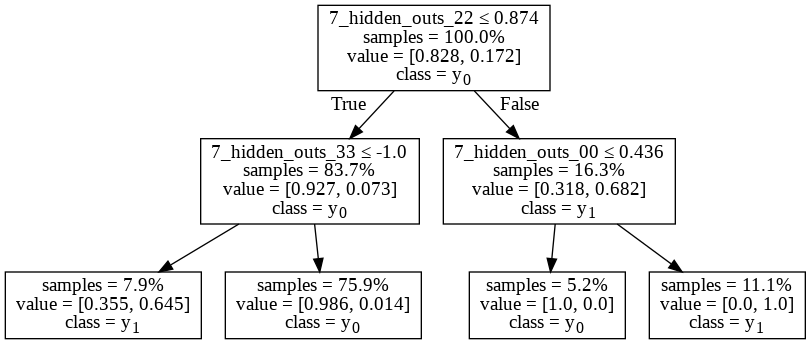

model_size_7_activation_tanh_front_feature_dataset.tsv
accuracy:  0.9616580310880829




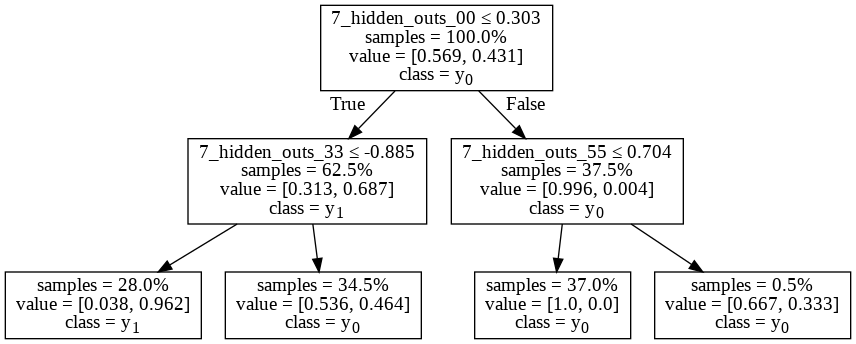

model_size_7_activation_tanh_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8275290215588723




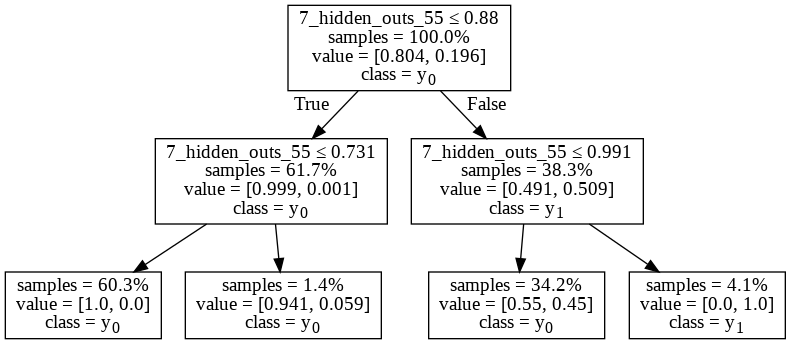

model_size_7_activation_tanh_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8449419568822554




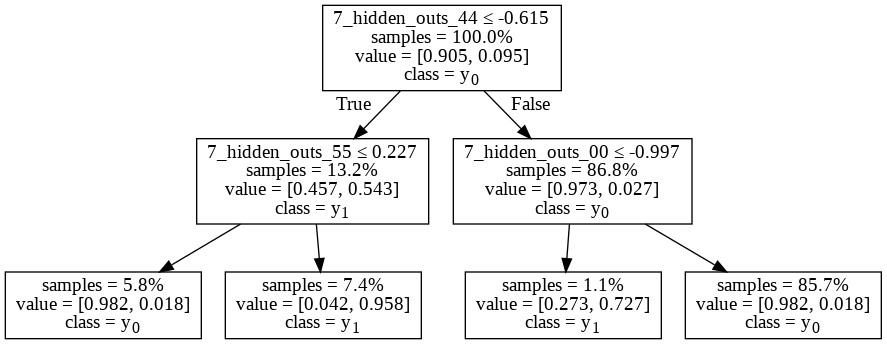

model_size_7_activation_tanh_voiced_stop_consonant_dataset.tsv
accuracy:  0.9772020725388602




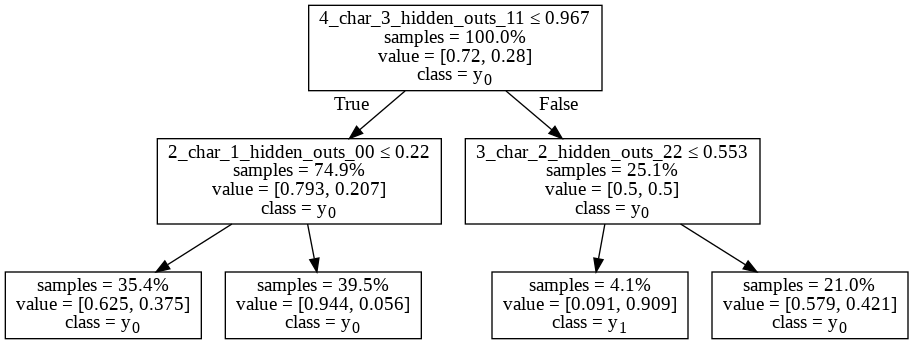

model_size_3_activation_sigmoid_front_harmony_dataset.tsv
accuracy:  0.7527675276752768




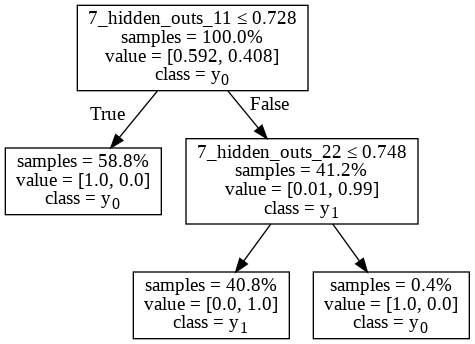

model_size_3_activation_sigmoid_vov_vs_cons_dataset.tsv
accuracy:  1.0




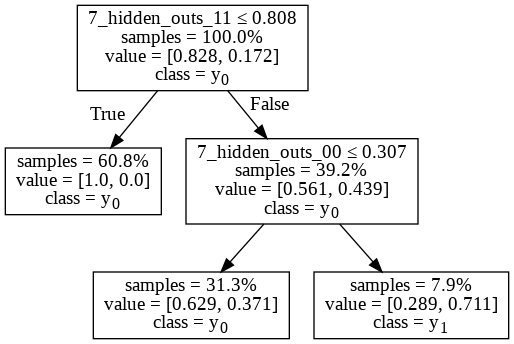

model_size_3_activation_sigmoid_front_feature_dataset.tsv
accuracy:  0.861139896373057




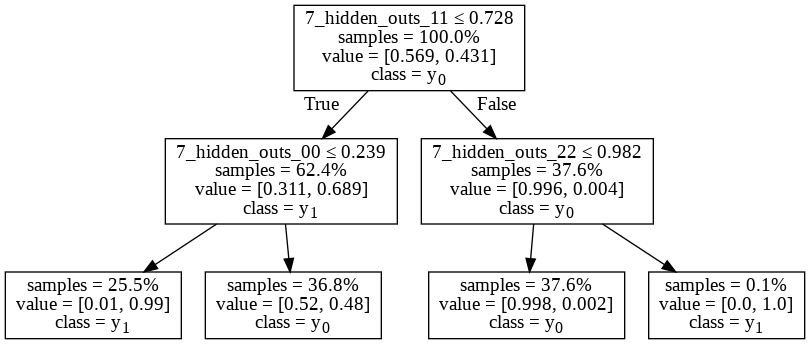

model_size_3_activation_sigmoid_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8200663349917081




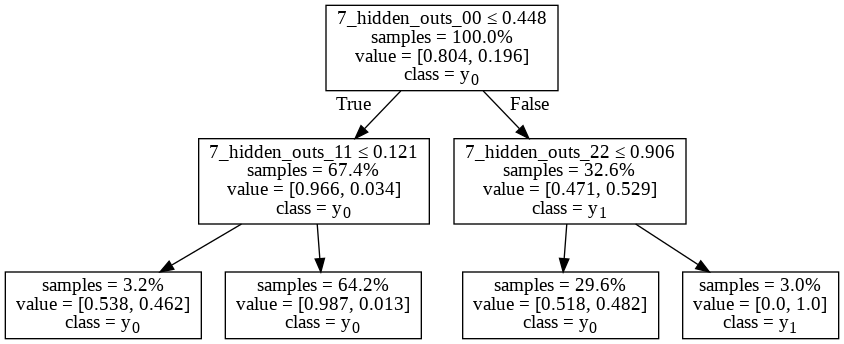

model_size_3_activation_sigmoid_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8341625207296849




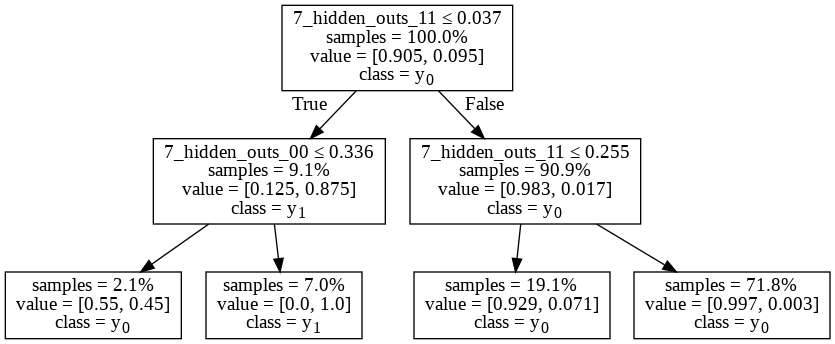

model_size_3_activation_sigmoid_voiced_stop_consonant_dataset.tsv
accuracy:  0.9751295336787564




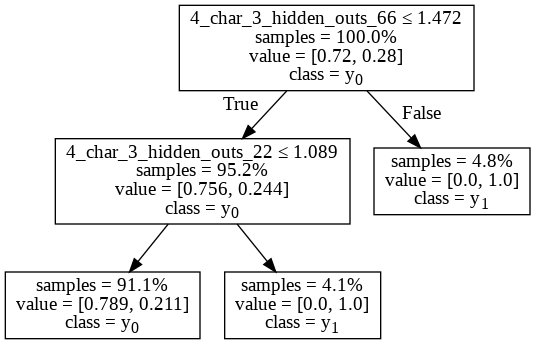

model_size_8_activation_relu_front_harmony_dataset.tsv
accuracy:  0.8081180811808119




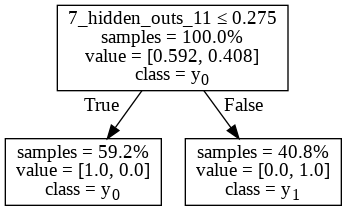

model_size_8_activation_relu_vov_vs_cons_dataset.tsv
accuracy:  1.0




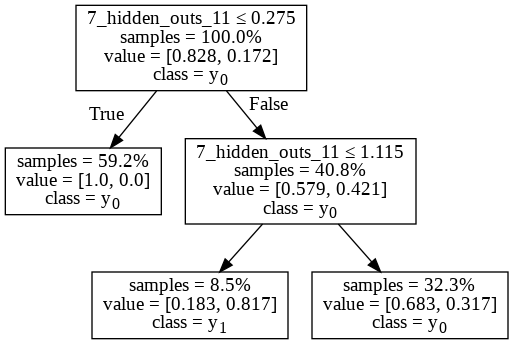

model_size_8_activation_relu_front_feature_dataset.tsv
accuracy:  0.8818652849740932




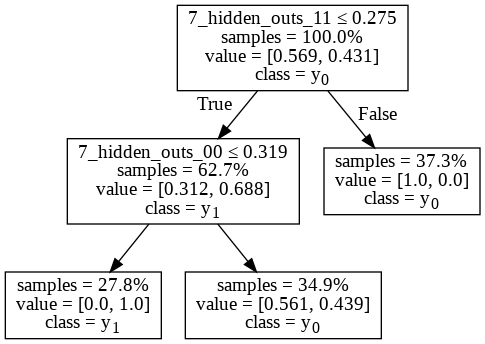

model_size_8_activation_relu_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8466003316749585




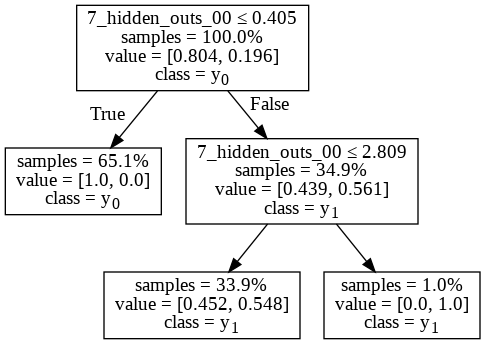

model_size_8_activation_relu_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8466003316749585




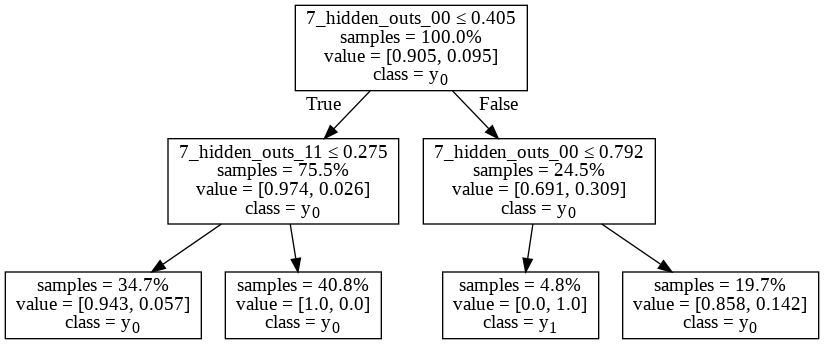

model_size_8_activation_relu_voiced_stop_consonant_dataset.tsv
accuracy:  0.9523316062176166




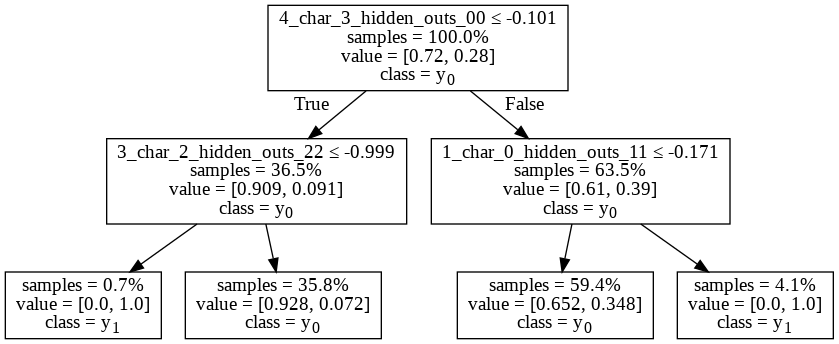

model_size_3_activation_tanh_front_harmony_dataset.tsv
accuracy:  0.7675276752767528




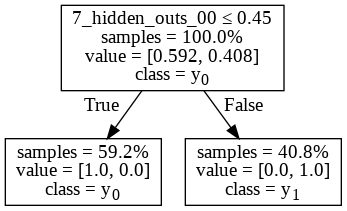

model_size_3_activation_tanh_vov_vs_cons_dataset.tsv
accuracy:  1.0




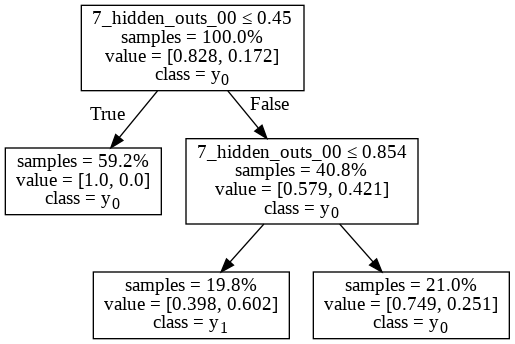

model_size_3_activation_tanh_front_feature_dataset.tsv
accuracy:  0.8683937823834197




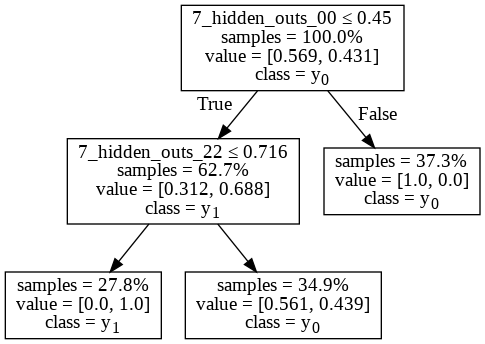

model_size_3_activation_tanh_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8466003316749585




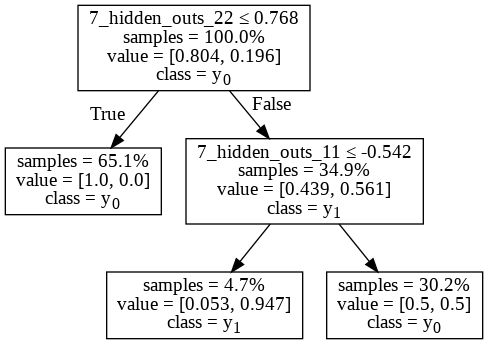

model_size_3_activation_tanh_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8466003316749585




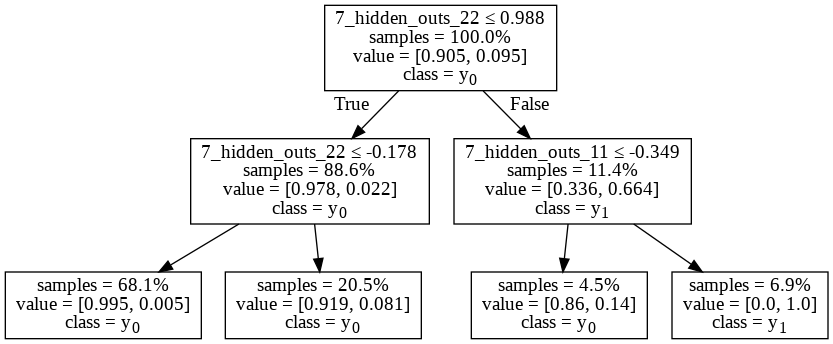

model_size_3_activation_tanh_voiced_stop_consonant_dataset.tsv
accuracy:  0.9740932642487047




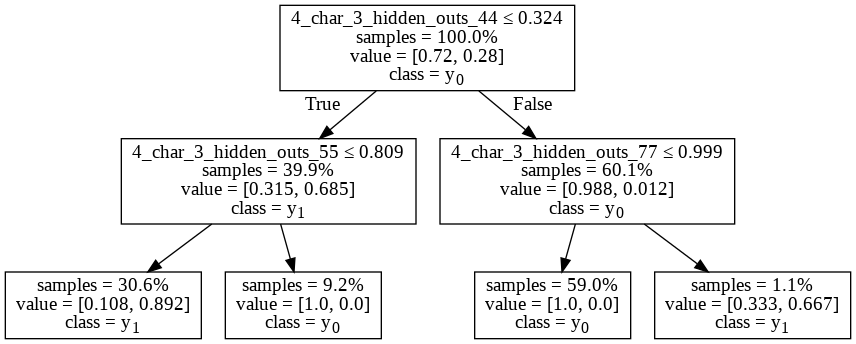

model_size_8_activation_sigmoid_front_harmony_dataset.tsv
accuracy:  0.9630996309963099




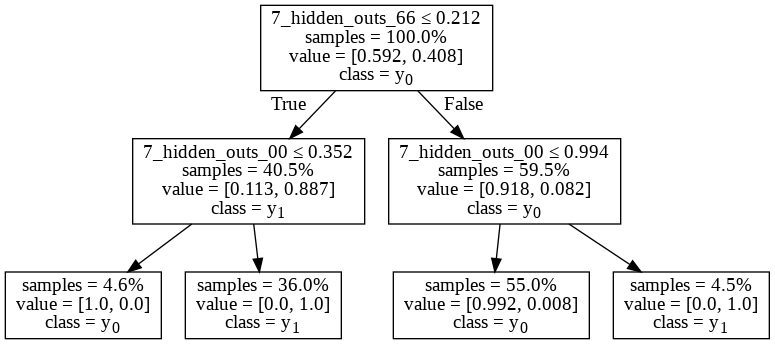

model_size_8_activation_sigmoid_vov_vs_cons_dataset.tsv
accuracy:  0.9958549222797928




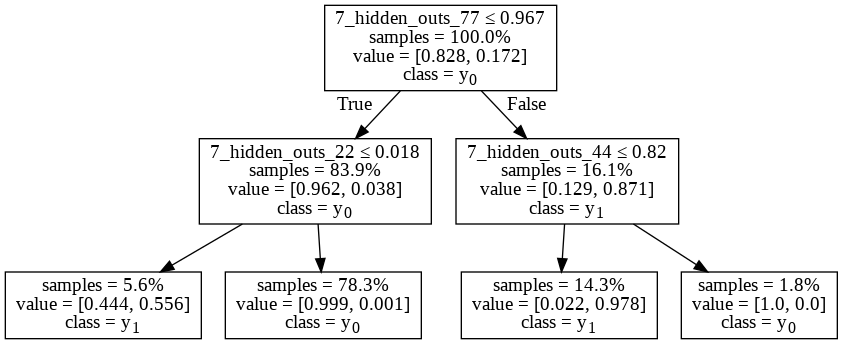

model_size_8_activation_sigmoid_front_feature_dataset.tsv
accuracy:  0.9709844559585492




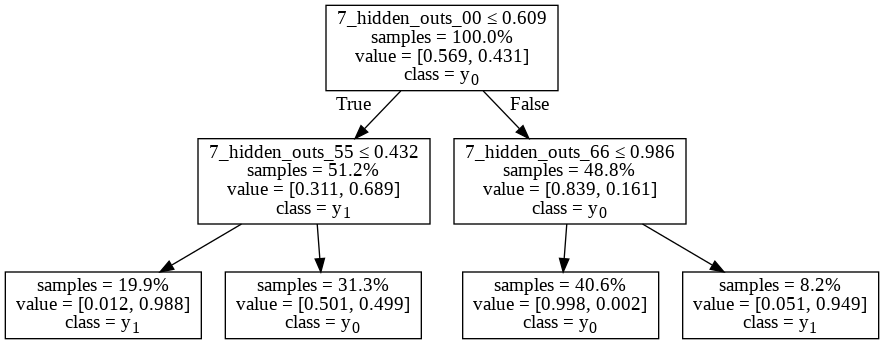

model_size_8_activation_sigmoid_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8366500829187397




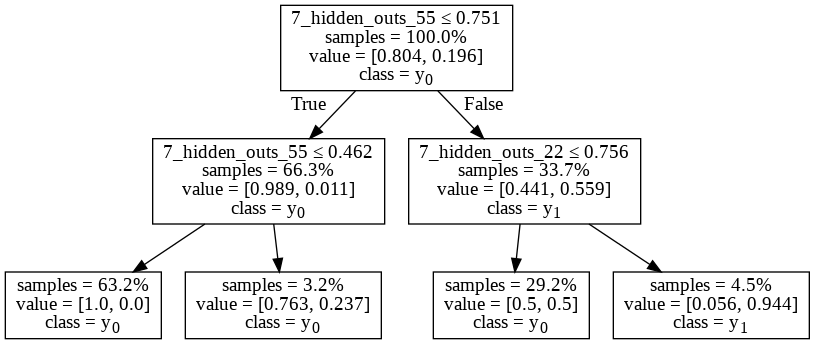

model_size_8_activation_sigmoid_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8441127694859039




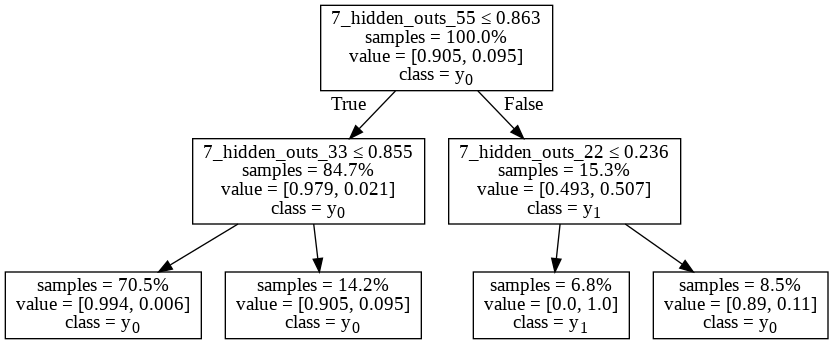

model_size_8_activation_sigmoid_voiced_stop_consonant_dataset.tsv
accuracy:  0.9730569948186528




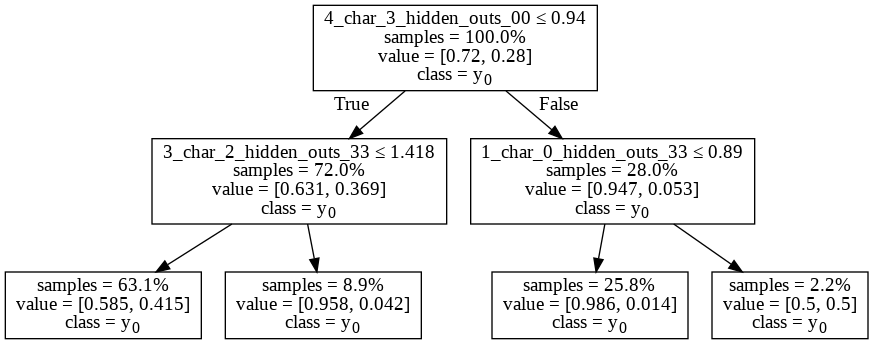

model_size_4_activation_relu_front_harmony_dataset.tsv
accuracy:  0.7195571955719557




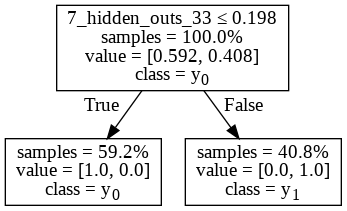

model_size_4_activation_relu_vov_vs_cons_dataset.tsv
accuracy:  1.0




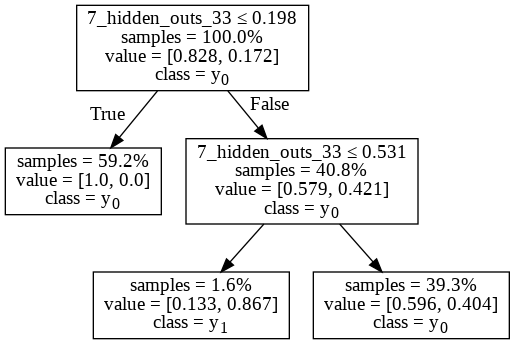

model_size_4_activation_relu_front_feature_dataset.tsv
accuracy:  0.8393782383419689




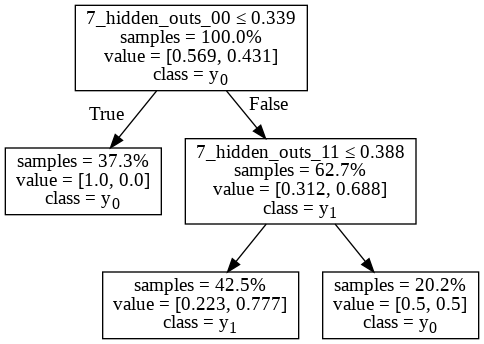

model_size_4_activation_relu_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8043117744610282




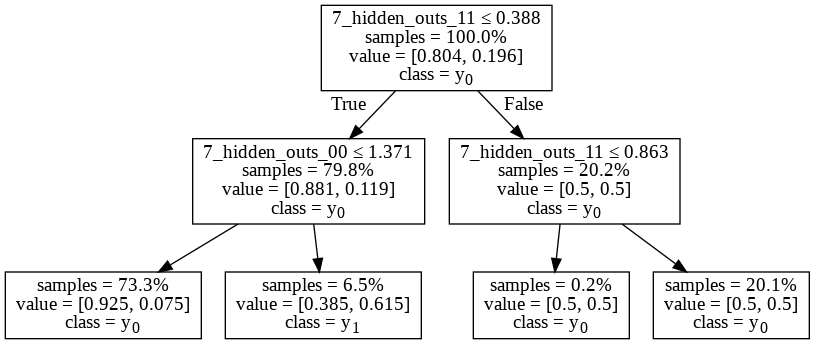

model_size_4_activation_relu_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8192371475953566




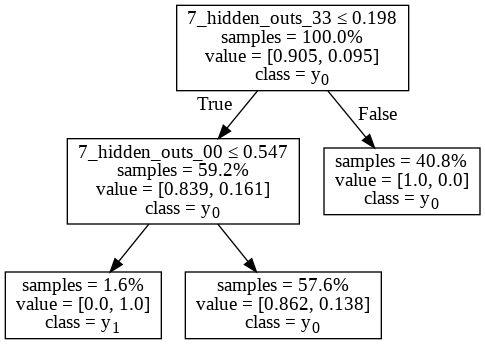

model_size_4_activation_relu_voiced_stop_consonant_dataset.tsv
accuracy:  0.9202072538860103




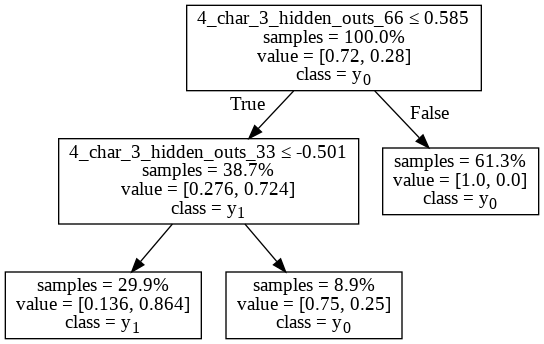

model_size_8_activation_tanh_front_harmony_dataset.tsv
accuracy:  0.9372693726937269




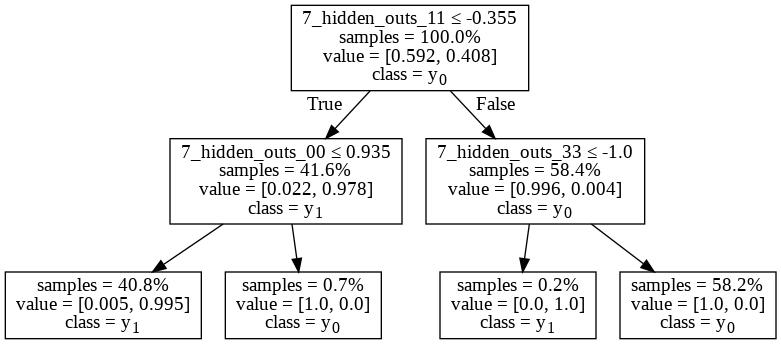

model_size_8_activation_tanh_vov_vs_cons_dataset.tsv
accuracy:  0.9979274611398964




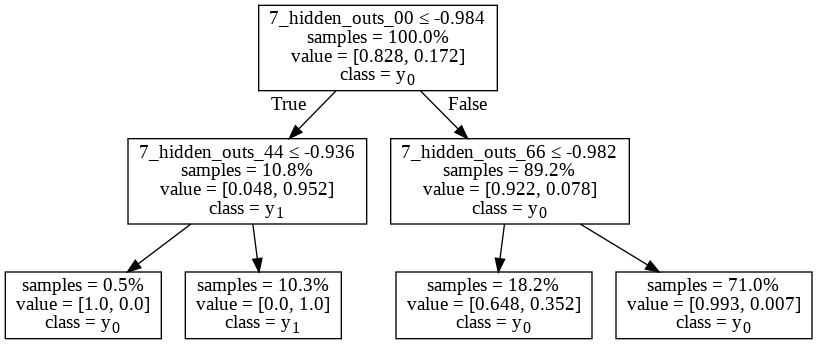

model_size_8_activation_tanh_front_feature_dataset.tsv
accuracy:  0.9305699481865285




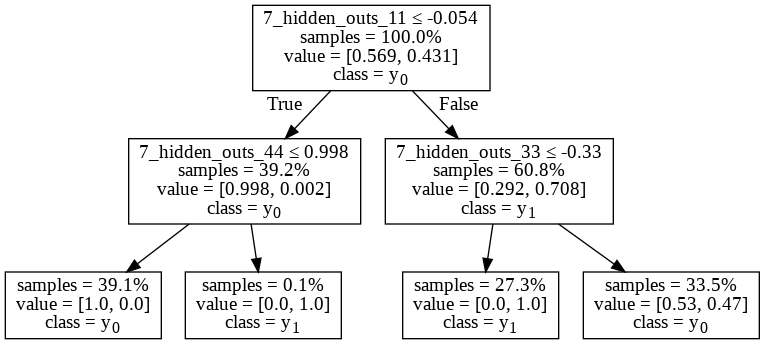

model_size_8_activation_tanh_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8424543946932007




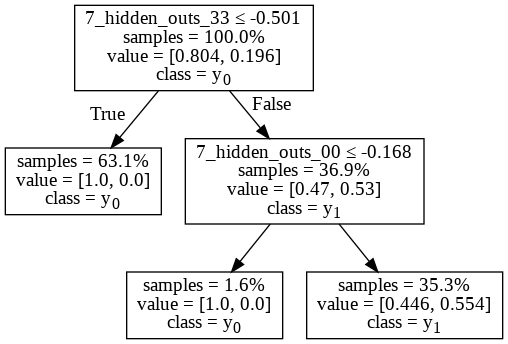

model_size_8_activation_tanh_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8424543946932007




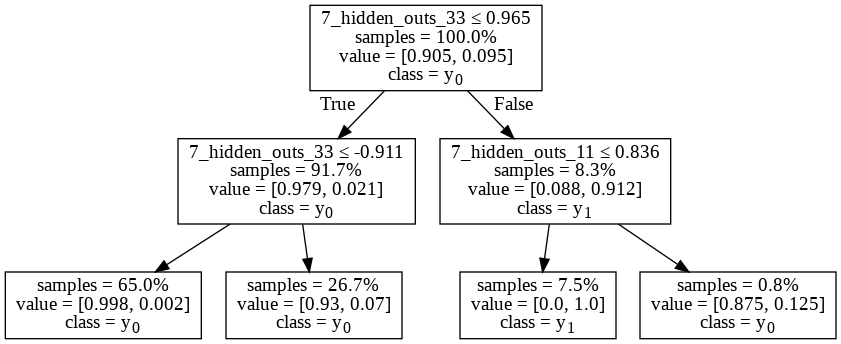

model_size_8_activation_tanh_voiced_stop_consonant_dataset.tsv
accuracy:  0.9792746113989638




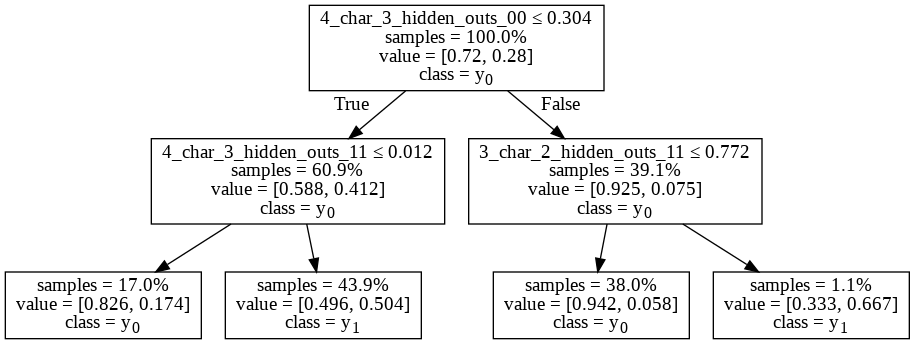

model_size_4_activation_sigmoid_front_harmony_dataset.tsv
accuracy:  0.7269372693726938




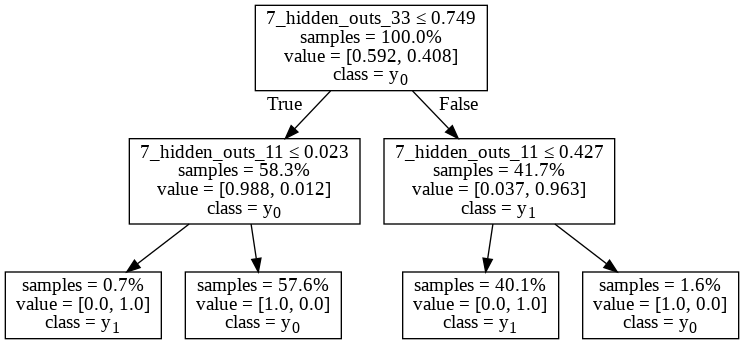

model_size_4_activation_sigmoid_vov_vs_cons_dataset.tsv
accuracy:  1.0




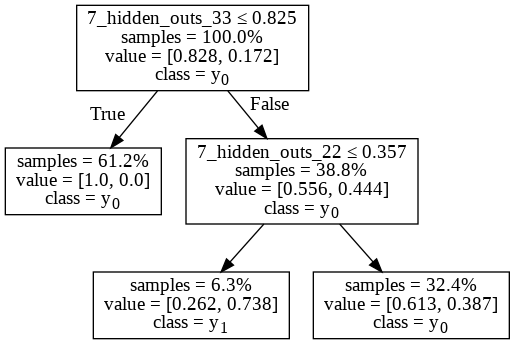

model_size_4_activation_sigmoid_front_feature_dataset.tsv
accuracy:  0.8580310880829015




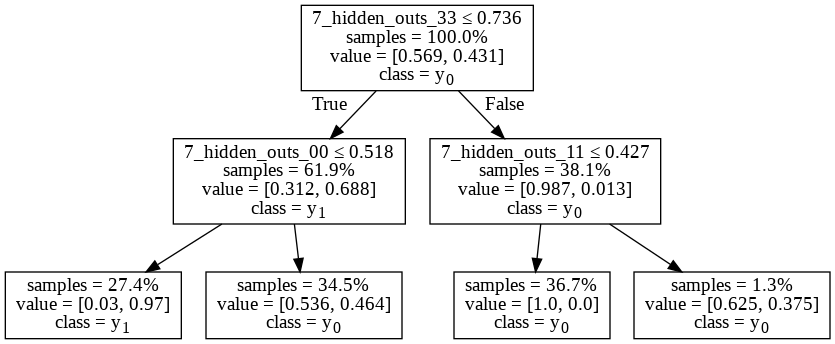

model_size_4_activation_sigmoid_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8266998341625207




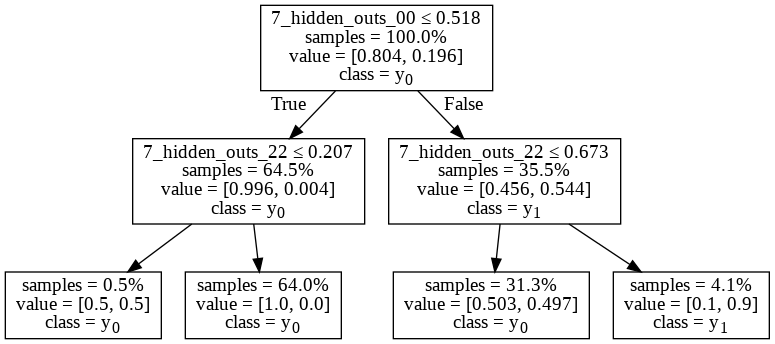

model_size_4_activation_sigmoid_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8374792703150912




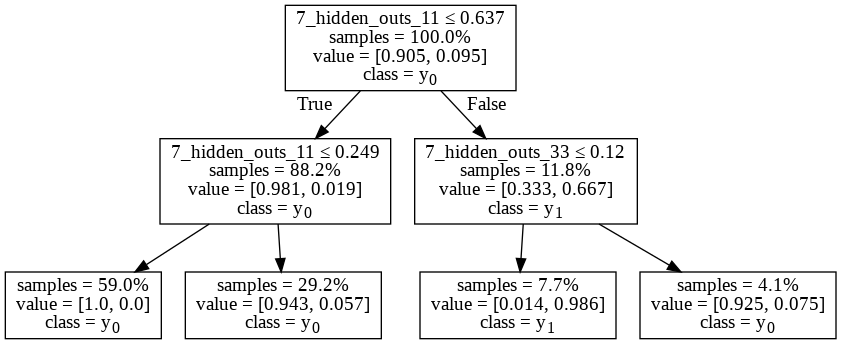

model_size_4_activation_sigmoid_voiced_stop_consonant_dataset.tsv
accuracy:  0.9792746113989638




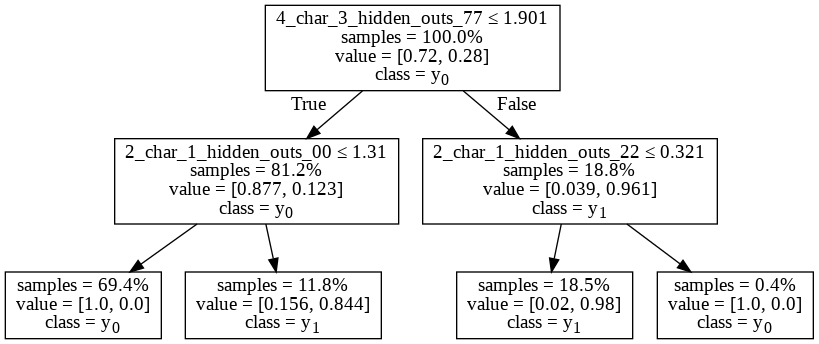

model_size_9_activation_relu_front_harmony_dataset.tsv
accuracy:  0.977859778597786




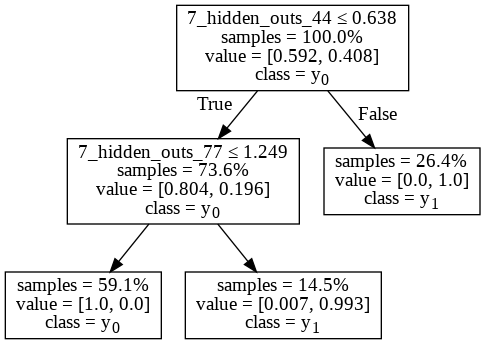

model_size_9_activation_relu_vov_vs_cons_dataset.tsv
accuracy:  0.9989637305699481




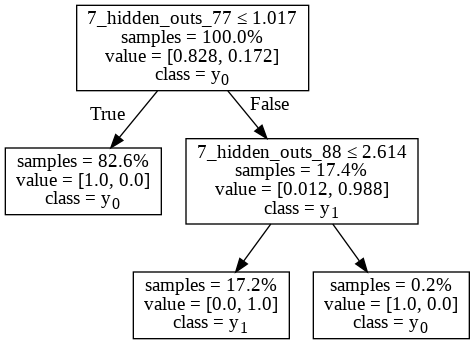

model_size_9_activation_relu_front_feature_dataset.tsv
accuracy:  1.0




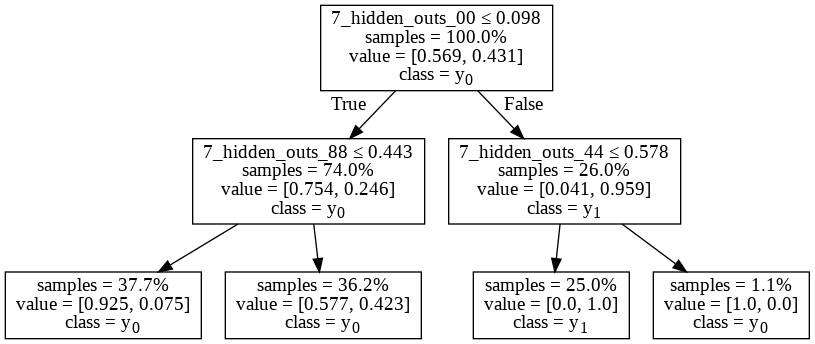

model_size_9_activation_relu_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.818407960199005




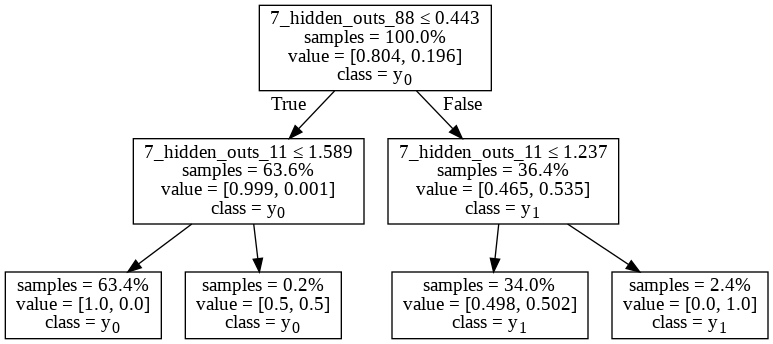

model_size_9_activation_relu_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8300165837479271




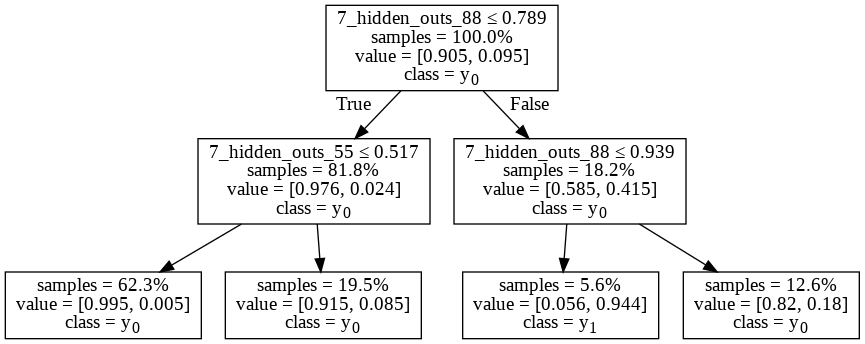

model_size_9_activation_relu_voiced_stop_consonant_dataset.tsv
accuracy:  0.9544041450777202




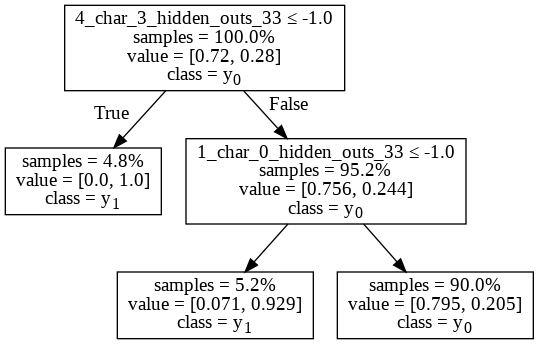

model_size_4_activation_tanh_front_harmony_dataset.tsv
accuracy:  0.8118081180811808




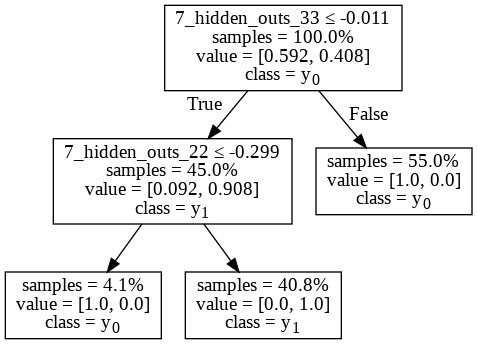

model_size_4_activation_tanh_vov_vs_cons_dataset.tsv
accuracy:  1.0




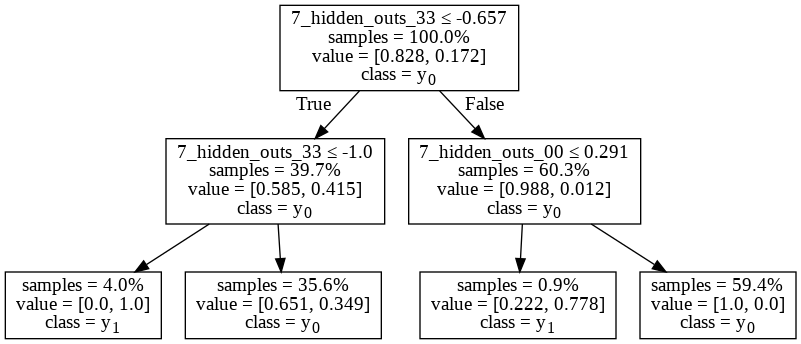

model_size_4_activation_tanh_front_feature_dataset.tsv
accuracy:  0.8735751295336788




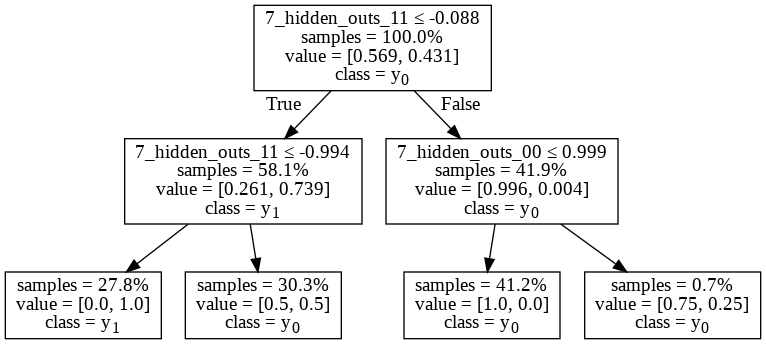

model_size_4_activation_tanh_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8466003316749585




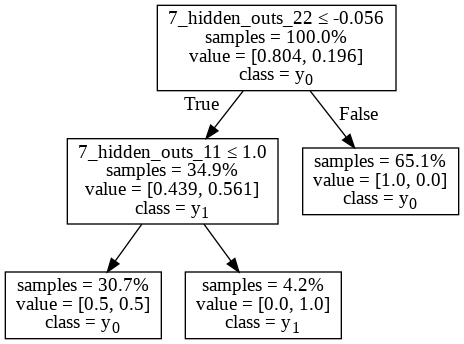

model_size_4_activation_tanh_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8466003316749585




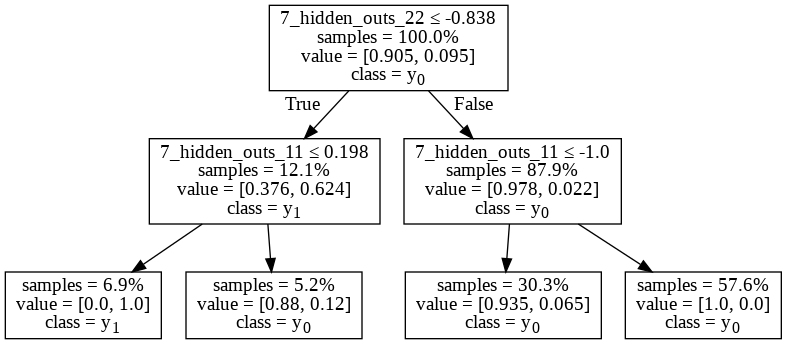

model_size_4_activation_tanh_voiced_stop_consonant_dataset.tsv
accuracy:  0.9740932642487047




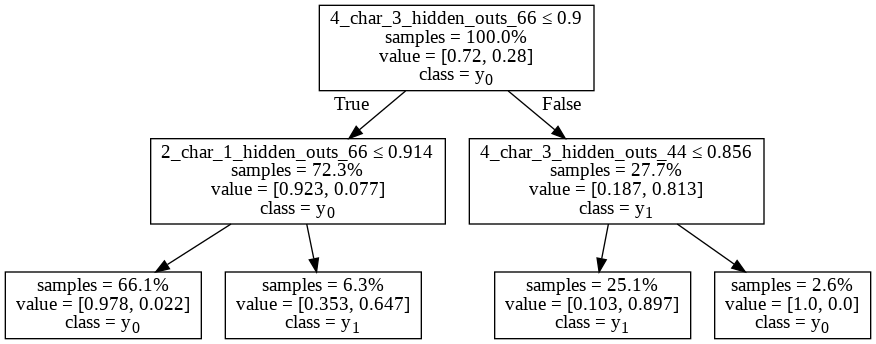

model_size_9_activation_sigmoid_front_harmony_dataset.tsv
accuracy:  0.9372693726937269




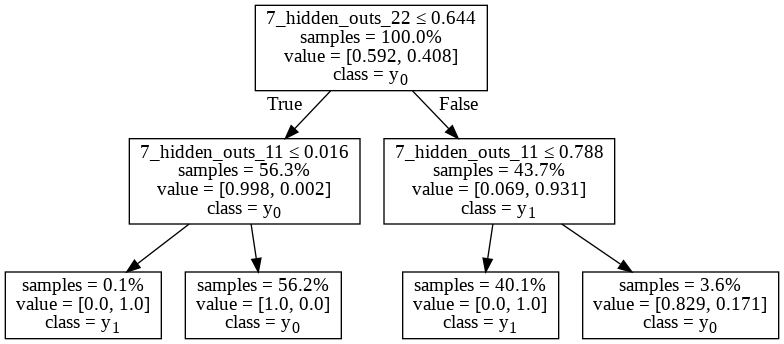

model_size_9_activation_sigmoid_vov_vs_cons_dataset.tsv
accuracy:  0.9937823834196892




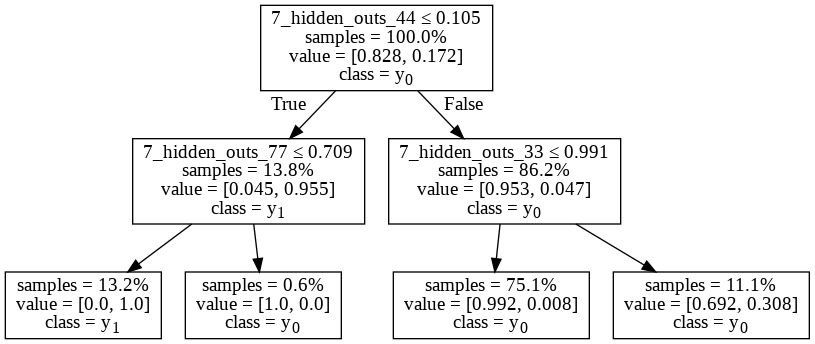

model_size_9_activation_sigmoid_front_feature_dataset.tsv
accuracy:  0.9595854922279793




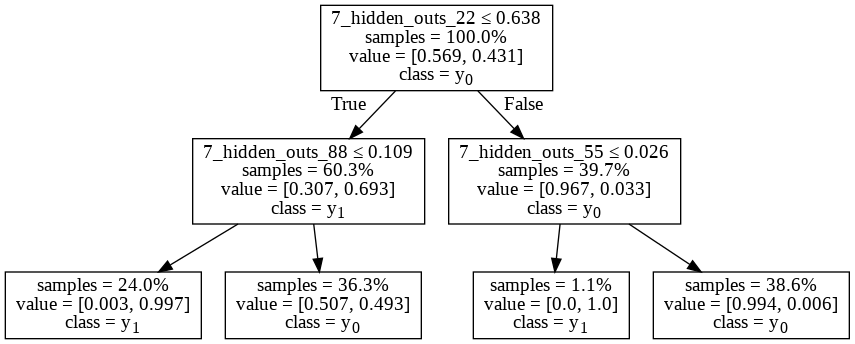

model_size_9_activation_sigmoid_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8175787728026535




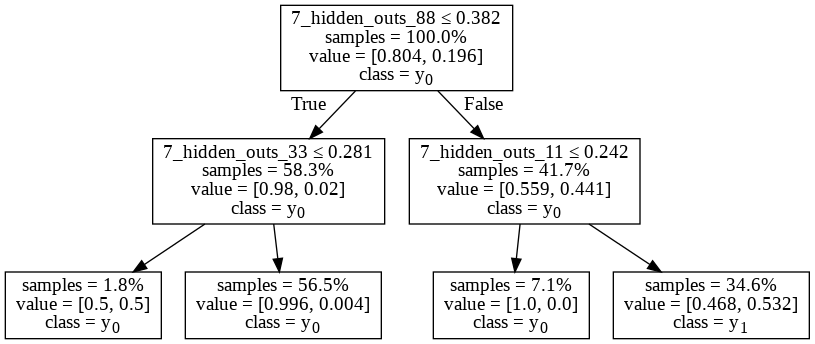

model_size_9_activation_sigmoid_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8266998341625207




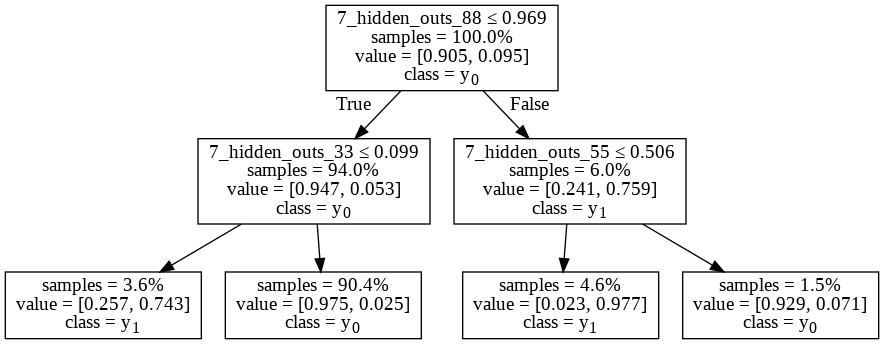

model_size_9_activation_sigmoid_voiced_stop_consonant_dataset.tsv
accuracy:  0.9658031088082901




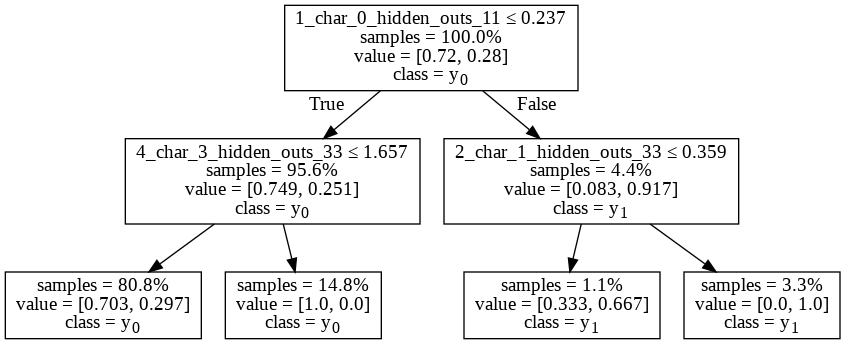

model_size_5_activation_relu_front_harmony_dataset.tsv
accuracy:  0.7564575645756457




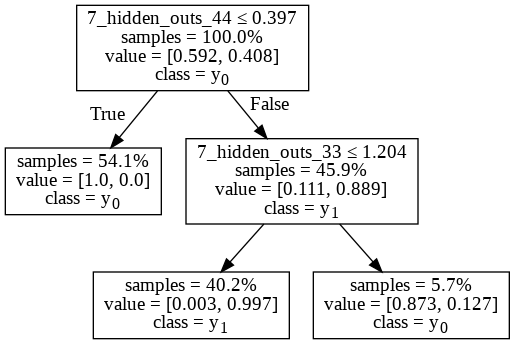

model_size_5_activation_relu_vov_vs_cons_dataset.tsv
accuracy:  0.9917098445595854




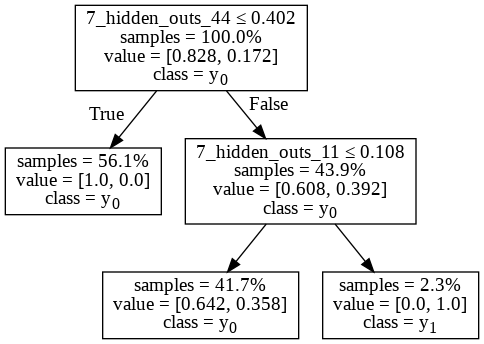

model_size_5_activation_relu_front_feature_dataset.tsv
accuracy:  0.8507772020725388




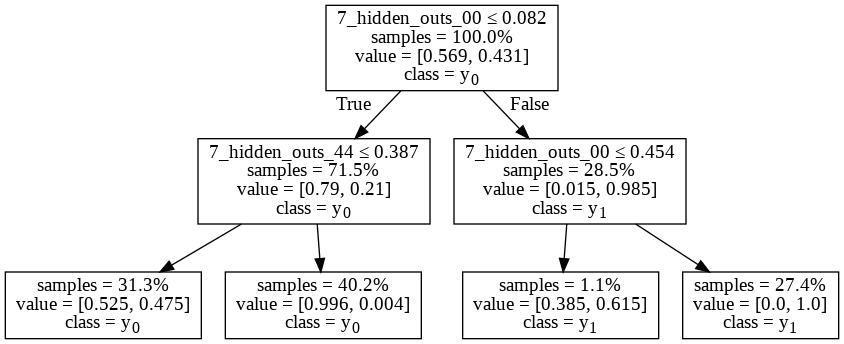

model_size_5_activation_relu_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.845771144278607




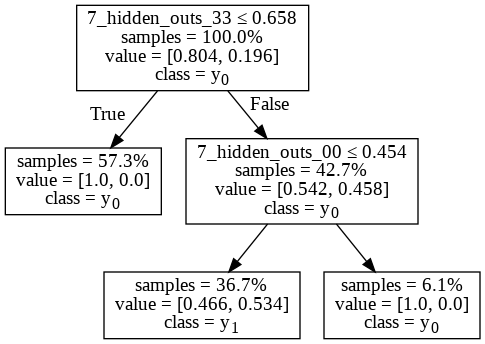

model_size_5_activation_relu_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8291873963515755




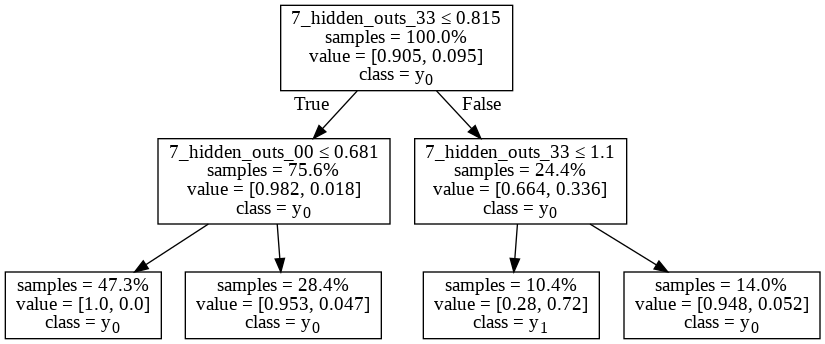

model_size_5_activation_relu_voiced_stop_consonant_dataset.tsv
accuracy:  0.950259067357513




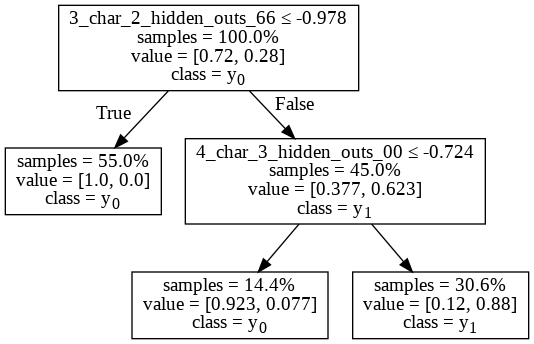

model_size_9_activation_tanh_front_harmony_dataset.tsv
accuracy:  0.9520295202952029




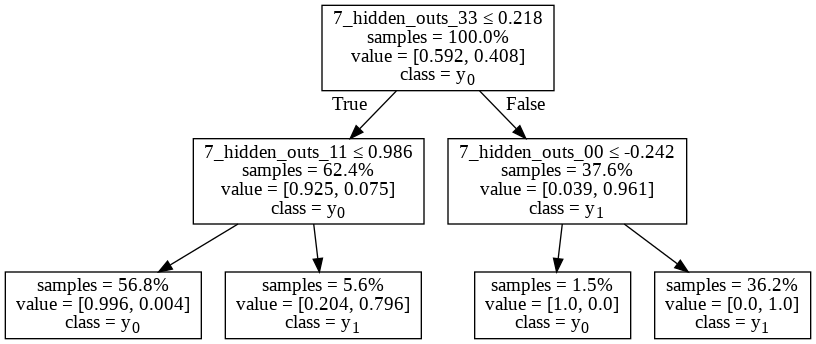

model_size_9_activation_tanh_vov_vs_cons_dataset.tsv
accuracy:  0.9865284974093265




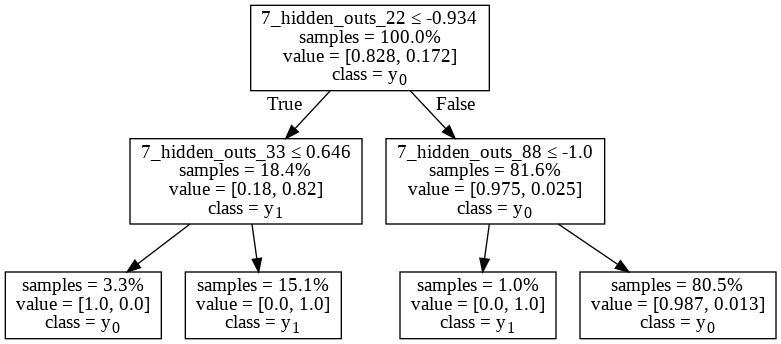

model_size_9_activation_tanh_front_feature_dataset.tsv
accuracy:  0.9896373056994818




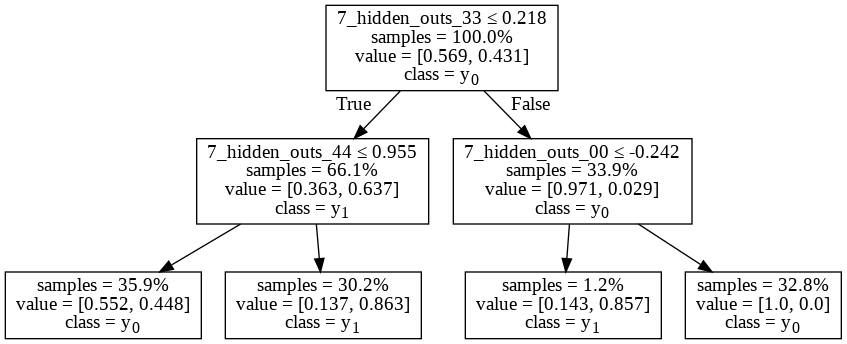

model_size_9_activation_tanh_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.7960199004975125




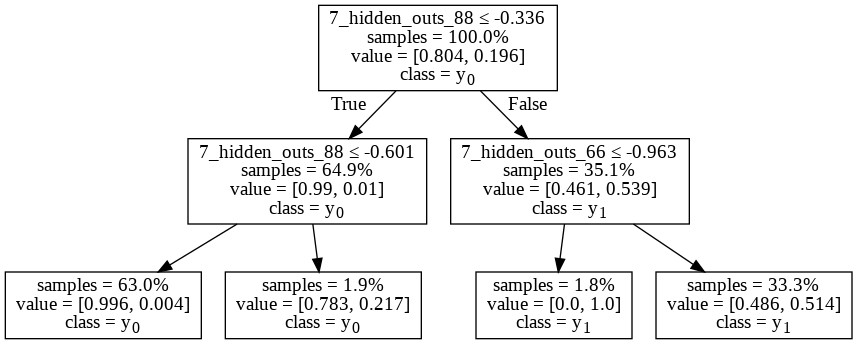

model_size_9_activation_tanh_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8316749585406302




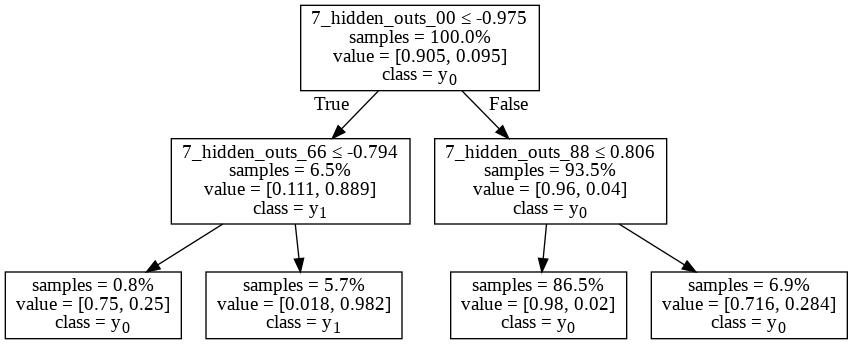

model_size_9_activation_tanh_voiced_stop_consonant_dataset.tsv
accuracy:  0.9595854922279793




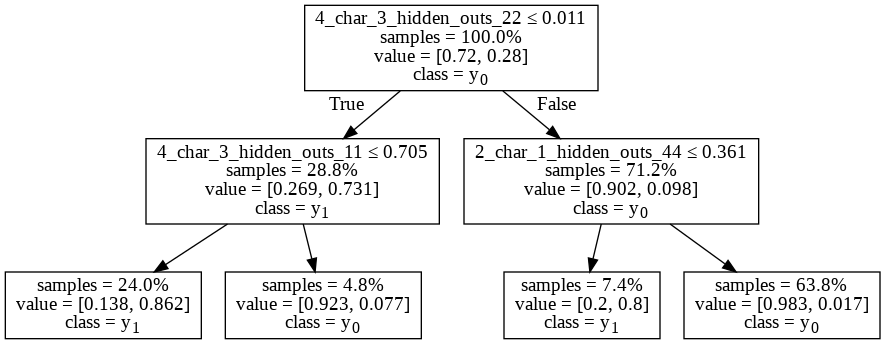

model_size_5_activation_sigmoid_front_harmony_dataset.tsv
accuracy:  0.9372693726937269




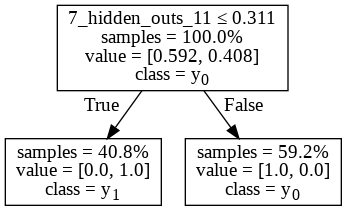

model_size_5_activation_sigmoid_vov_vs_cons_dataset.tsv
accuracy:  1.0




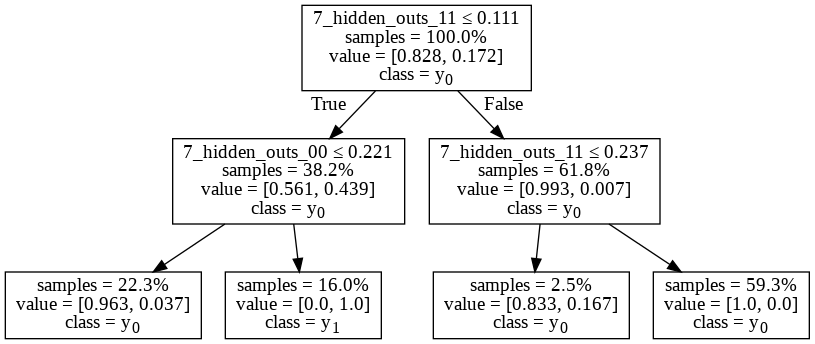

model_size_5_activation_sigmoid_front_feature_dataset.tsv
accuracy:  0.9875647668393782




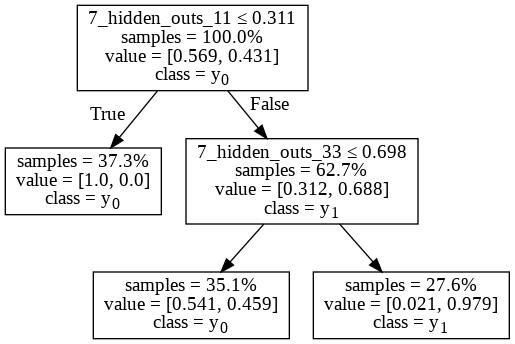

model_size_5_activation_sigmoid_is_starting_consonant_cluster_dataset.tsv
accuracy:  0.8333333333333334




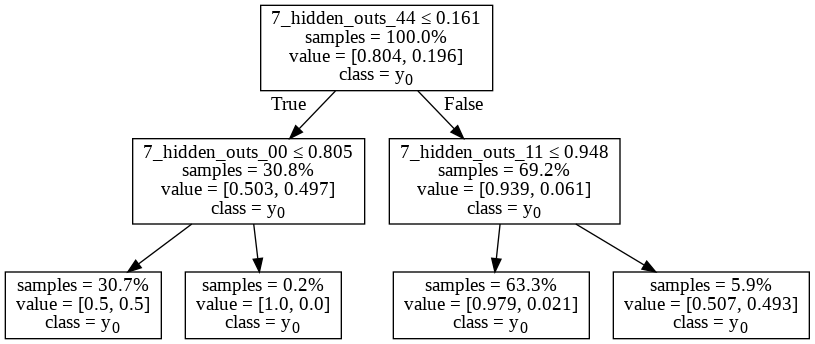

model_size_5_activation_sigmoid_second_consonant_in_cluster_dataset.tsv
accuracy:  0.8043117744610282




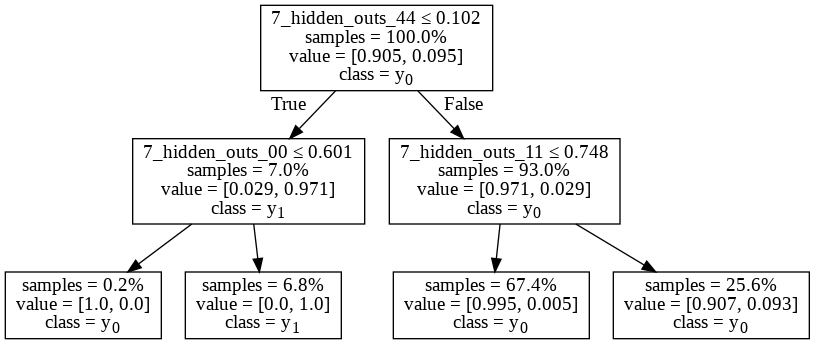

model_size_5_activation_sigmoid_voiced_stop_consonant_dataset.tsv
accuracy:  0.9730569948186528




In [20]:
for task_fn in datasets:
    
    task_df = pd.read_csv(task_fn, delimiter='\t', encoding="utf-8")

    feature_colnames = [colname 
                        for colname in task_df.columns[2:-1] 
                        if "hidden_outs" in colname]
#                         or "output_ins" in colname]
    target_colname = task_df.columns[-1]


    y = task_df[target_colname]
    X = task_df[feature_colnames]

    dt = DecisionTreeClassifier(max_depth=2)
    dt.fit(X, y)

    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data, special_characters=True, feature_names=X.columns, 
                    class_names=True, proportion=True, impurity=False)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))
    print(task_fn)
    print("accuracy: ", dt.score(X, y))

    print("======================")
    print("")
    print("")

    

Index(['3_weight_H0_H0', '3_weight_H1_H0', '3_weight_H0_H1', '3_weight_H1_H1',
       '4_weight_H0_O0', '4_weight_H1_O0', '4_weight_H0_O1', '4_weight_H1_O1',
       '4_weight_H0_O2', '4_weight_H1_O2', '4_weight_H0_O3', '4_weight_H1_O3',
       '4_weight_H0_O4', '4_weight_H1_O4', '4_weight_H0_O5', '4_weight_H1_O5',
       '4_weight_H0_O6', '4_weight_H1_O6', '4_weight_H0_O7', '4_weight_H1_O7',
       '4_weight_H0_O8', '4_weight_H1_O8', '4_weight_H0_O9', '4_weight_H1_O9',
       '4_weight_H0_O10', '4_weight_H1_O10', '4_weight_H0_O11',
       '4_weight_H1_O11', '4_weight_H0_O12', '4_weight_H1_O12',
       '4_weight_H0_O13', '4_weight_H1_O13', '4_weight_H0_O14',
       '4_weight_H1_O14', '4_weight_H0_O15', '4_weight_H1_O15',
       '4_weight_H0_O16', '4_weight_H1_O16', '4_weight_H0_O17',
       '4_weight_H1_O17', '4_weight_H0_O18', '4_weight_H1_O18',
       '4_weight_H0_O19', '4_weight_H1_O19', '4_weight_H0_O20',
       '4_weight_H1_O20', '4_weight_H0_O21', '4_weight_H1_O21',
       '4_weig